# Visualizing Results

In [719]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
import prompts
from IPython.display import display, HTML

In [720]:
# Load all_responses
all_responses = pd.read_csv('../results/all_responses_run_2.csv')
# Load groundtruth_df
groundtruth_df = pd.read_csv('../results/groundtruth_df_run_2.csv')

In [721]:
all_responses

,unique_id,question_2,question_3,question_4,question_5,question_6
0,DueoEkCNSrdjAkzn,"{\n ""categories"": [\n ""Domestic real econo...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Externalities"",\n ...","{\n ""categories_and_policies"": [\n {""categ...","```json\n{\n ""announcement_date"": """",\n ""ent..."
1,fbjFEgjb9FLcJ2e6,"{\n ""categories"": [\n ""Domestic real econo...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Externalities""\n ]\n}","{\n ""categories_and_policies"": [\n {""categ...","{\n ""announcement_date"": """",\n ""entry_into_f..."
2,Zh5iQXVczyUwinGR,"{\n ""categories"": [\n ""Domestic real econo...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Externalities"",\n ...","{\n ""categories_and_policies"": [\n {""categ...","```json\n{\n ""announcement_date"": ""2023-11-07..."
3,3zDkQRaHMFJvpzUc,"{\n ""categories"": [\n ""Domestic real econo...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Externalities"",\n ...","{\n ""categories_and_policies"": [\n {""categ...","```json\n{\n ""announcement_date"": """",\n ""ent..."
4,w0J7Xs9DoY23oeCt,"{\n ""categories"": [\n ""Domestic real econo...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Externalities"",\n ...","{\n ""categories_and_policies"": [\n {""categ...","{\n ""announcement_date"": """",\n ""entry_into_f..."
...,...,...,...,...,...,...
137,ldyDWFana7Mtg9DA,"{\n ""categories"": [\n ""International clima...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Information asymmetry...","{\n ""categories_and_policies"": [\n {""categ...","```json\n{\n ""announcement_date"": """",\n ""ent..."
138,epT5n3eO1Zykzsd7,"{\n ""categories"": [\n ""International clima...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Public goods"",\n ""...","{\n ""categories_and_policies"": [\n {""categ...","{\n ""announcement_date"": """",\n ""entry_into_f..."
139,4F1rb0vmsfkNshQg,"{\n ""categories"": [\n ""Domestic real econo...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Public goods"",\n ""...","{\n ""categories_and_policies"": [\n {""categ...","```json\n{\n ""announcement_date"": """",\n ""ent..."
140,nUz7pimFcfuW0mEp,"{\n ""categories"": [\n ""International clima...","{\n ""categories_and_subjects"": [\n {""categ...","{\n ""subjects"": [\n ""Public goods"",\n ""...","{\n ""categories_and_policies"": [\n {""categ...","```json\n{\n ""announcement_date"": """",\n ""ent..."


Have to extract the information from the json before we can combine it with groundtruth

In [966]:
import json
import re

def extract_json_from_response(text):
    """
    Extract JSON from a response text. Handles cases where JSON might be wrapped in markdown code blocks
    or have extra text around it.
    """
    if pd.isna(text) or text == '':
        return None
    
    text = str(text).strip()
    
    # Try to find JSON in markdown code blocks first
    json_match = re.search(r'```(?:json)?\s*(\{.*?\})\s*```', text, re.DOTALL)
    if json_match:
        text = json_match.group(1)
    else:
        # Try to find JSON object directly
        json_match = re.search(r'\{.*\}', text, re.DOTALL)
        if json_match:
            text = json_match.group(0)
    
    try:
        return json.loads(text)
    except:
        return None

def parse_question_2_response(response):
    """Parse question 2 response which has format: {"categories": [...]}"""
    data = extract_json_from_response(response)
    if data and 'categories' in data:
        return '; '.join(data['categories'])
    return response  # Return original if parsing fails

def parse_question_3_response(response):
    """Parse question 3 response which has format: {"categories_and_subjects": [{"category": ..., "subject": ...}]}"""
    data = extract_json_from_response(response)
    if data and 'categories_and_subjects' in data:
        parts = []
        for item in data['categories_and_subjects']:
            category = item.get('category', '')
            subject = item.get('subject', '')
            if category and subject:
                parts.append(f"{category}: {subject}")
        return '; '.join(parts)
    return response  # Return original if parsing fails

def parse_question_4_response(response):
    """Parse question 4 response which has format: {"subjects": [...]} or {"market_failures": [...]}"""
    data = extract_json_from_response(response)
    if data:
        # Try different possible keys
        for key in ['subjects', 'market_failures', 'categories']:
            if key in data and isinstance(data[key], list):
                return '; '.join(data[key])
    return response  # Return original if parsing fails

def parse_question_5_response(response):
    """Parse question 5 response which has format: {"categories_and_policies": [{"category": ..., "policy": ...}]}"""
    data = extract_json_from_response(response)
    if data and 'categories_and_policies' in data:
        parts = []
        for item in data['categories_and_policies']:
            category = item.get('category', '')
            policy = item.get('policy', '')
            if category and policy:
                parts.append(f"{category}: {policy}")
        return '; '.join(parts)
    return response  # Return original if parsing fails

def parse_question_6_response(response):
    """Parse question 6 response which has format: {"announcement_date": ..., "entry_into_force_date": ..., ...}"""
    data = extract_json_from_response(response)
    if data:
        # Extract key fields and format as a readable string
        fields = []
        for key in ['announcement_date', 'entry_into_force_date', 'end_date', 
                   'adopting_authority_name', 'adopting_authority_type', 'policy_geographical_focus']:
            if key in data and data[key]:
                # Convert snake_case to Title Case
                label = key.replace('_', ' ').title()
                fields.append(f"{label}: {data[key]}")
        if fields:
            return '; '.join(fields)
    return response  # Return original if parsing fails

# Apply parsing to all_responses
all_responses_parsed = all_responses.copy()

# Parse each question column
if 'question_2' in all_responses_parsed.columns:
    all_responses_parsed['question_2'] = all_responses_parsed['question_2'].apply(parse_question_2_response)

if 'question_3' in all_responses_parsed.columns:
    all_responses_parsed['question_3'] = all_responses_parsed['question_3'].apply(parse_question_3_response)

if 'question_4' in all_responses_parsed.columns:
    all_responses_parsed['question_4'] = all_responses_parsed['question_4'].apply(parse_question_4_response)

if 'question_5' in all_responses_parsed.columns:
    all_responses_parsed['question_5'] = all_responses_parsed['question_5'].apply(parse_question_5_response)

if 'question_6' in all_responses_parsed.columns:
    all_responses_parsed['question_6'] = all_responses_parsed['question_6'].apply(parse_question_6_response)

print("JSON extraction complete!")
print(f"\nSample of parsed responses:")
print(all_responses_parsed.head())

# Update all_responses to use the parsed version
all_responses = all_responses_parsed


JSON extraction complete!

Sample of parsed responses:
          unique_id                                         question_2  \
0  DueoEkCNSrdjAkzn  Domestic real economy decarbonization measures...   
1  fbjFEgjb9FLcJ2e6  Domestic real economy decarbonization measures...   
2  Zh5iQXVczyUwinGR  Domestic real economy decarbonization measures...   
3  3zDkQRaHMFJvpzUc  Domestic real economy decarbonization measures...   
4  w0J7Xs9DoY23oeCt  Domestic real economy decarbonization measures...   

                                          question_3  \
0  Products: Environmental markets; Entities: Non...   
1  Entities: Non-financial corporations (excludin...   
2  Products: Grants; Entities: Public bodies (exc...   
3  Entities: Public bodies (excluding state-owned...   
4  Entities: Public bodies (excluding state-owned...   

                                          question_4  \
0  Externalities; Missing markets; Information as...   
1                                      Externalitie

In [723]:
all_responses

,unique_id,question_2,question_3,question_4,question_5,question_6
0,DueoEkCNSrdjAkzn,Domestic real economy decarbonization measures...,Products: Environmental markets; Entities: Non...,Externalities; Missing markets; Information as...,Hybrid: Emissions trading systems; Information...,Adopting Authority Type: Government; Policy Ge...
1,fbjFEgjb9FLcJ2e6,Domestic real economy decarbonization measures...,Entities: Non-financial corporations (excludin...,Externalities,Hybrid: Emissions trading systems; Information...,Entry Into Force Date: 2025-10-14; Adopting Au...
2,Zh5iQXVczyUwinGR,Domestic real economy decarbonization measures...,Products: Grants; Entities: Public bodies (exc...,Externalities; Public goods,"Market-based: Concessional finance, subsidies ...",Announcement Date: 2023-11-07; Entry Into Forc...
3,3zDkQRaHMFJvpzUc,Domestic real economy decarbonization measures...,Entities: Public bodies (excluding state-owned...,Externalities; Public goods; Information asymm...,"Market-based: Concessional finance, subsidies ...",End Date: August 2027; Adopting Authority Name...
4,w0J7Xs9DoY23oeCt,Domestic real economy decarbonization measures...,Entities: Public bodies (excluding state-owned...,Externalities; Public goods; Missing markets,"Market-based: Concessional finance, subsidies ...",Adopting Authority Name: Environment and Clima...
...,...,...,...,...,...,...
137,ldyDWFana7Mtg9DA,International climate-focused financial suppor...,Entities: Non-financial corporations (excludin...,Information asymmetry; Coordination,"Market-based: Concessional finance, subsidies ...",Entry Into Force Date: 2019; End Date: 2024; A...
138,epT5n3eO1Zykzsd7,International climate-focused financial support,Products: Grants; Entities: Public bodies (exc...,Public goods; Externalities; Coordination,"Market-based: Concessional finance, subsidies ...",Entry Into Force Date: 2022-08-26; Adopting Au...
139,4F1rb0vmsfkNshQg,"Domestic real economy adaptation, compensation...",Entities: Public bodies (excluding state-owned...,Public goods; Externalities,"Market-based: Concessional finance, subsidies ...",Entry Into Force Date: 2018-03-08; End Date: 2...
140,nUz7pimFcfuW0mEp,International climate-focused financial suppor...,Products: Grants; Entities: Non-financial corp...,Public goods; Coordination,"Market-based: Concessional finance, subsidies ...",Entry Into Force Date: 2019-03-27; End Date: 2...


____

In [724]:
groundtruth_df_slim = groundtruth_df[['question_2', 'question_3', 'question_4', 'question_5', 'unique_id']].copy()
groundtruth_df_slim['question_6'] = 'n/a'
groundtruth_df_slim

,question_2,question_3,question_4,question_5,unique_id,question_6
0,Domestic real economy decarbonization measures...,Product: Debt instruments,Coordination; information asymmetry,Market-based: market infrastructure; Informati...,3Oahxp3pihpVDQVt,n/a
1,Domestic real economy adaptation and compensat...,Entity: Public bodies,Public goods,"Market-based: concessional finance, subsidies ...",tnaWzSNVgSLTv7XX,n/a
2,Domestic real economy decarbonization measures...,Entuty: Sovereign funds and investment-focused...,Myopia; missing markets; externalities.,Command-and-control: Investment mandates or co...,K96A0SZrnego6D4a,n/a
3,Domestic real economy decarbonization measures...,Entity: non-financial firms,"Externalities, public goods","Market-based: concessional finance, subsidies ...",G6RmGheTDI0EhzXd,n/a
4,Domestic real economy decarbonization measures...,Entity: non-financial firms,"Externalities, public goods","Market-based: concessional finance, subsidies ...",rxkDG0Ai5LbWIkAw,n/a
5,Domestic real economy decarbonization measures...,Entity: non-financial firms,"Externalities, public goods","Market-based: concessional finance, subsidies ...",zm6ny9KbxXZrYyEM,n/a
6,Domestic real economy decarbonization measures...,Entity: non-financial firms,"Externalities, public goods","Market-based: concessional finance, subsidies ...",cbRMF5EZrlSlsqq1,n/a
7,Domestic real economy decarbonization measures...,Entity: Sovereign funds and investment-focused...,Coordination; Public Goods,"Market-based: concessional finance, subsidies ...",eRFNvUxTiyJ5mgky,n/a
8,Domestic real economy decarbonization measures...,Domestic real economy decarbonization measures...,Domestic real economy decarbonization measures...,Domestic real economy decarbonization measures...,lf0vaU6VpW26FhQV,n/a
9,Domestic financial sector policy,"Entity: Commercial banks, cooperatives, credit...",Coordination; information asymmetry; myopia; s...,Informational: mandatory information disclosur...,vAu7yXhg2dOCsQzf,n/a


In [725]:
# Combine groundtruth_df_slim and all_responses (renamed to all_results if needed)

# Ensure naming consistency (all_responses is the table already loaded, instructions refer to all_results)
all_results = all_responses

# Align columns and order (in case of extra columns)
common_cols = [col for col in groundtruth_df_slim.columns if col in all_results.columns]

# Subset both DataFrames to the same columns/order
groundtruth_slim = groundtruth_df_slim[common_cols]
all_results_slim = all_results[common_cols]

# Combine the two (stack one after the other)
combined_df = pd.concat([groundtruth_slim, all_results_slim], ignore_index=True)

# Set 'unique_id' as the index, then flatten (reset index)
if 'unique_id' in combined_df.columns:
    combined_df = combined_df.set_index('unique_id')

# Flatten the DataFrame so unique_id is back as a column, not the index
combined_df = combined_df.reset_index()

# Optionally, show the head of the combined dataframe
len(combined_df)


156

In [726]:
COLOR_SCHEMA = [
    "#8a7967", # light taupe
    "#d9b382", # sand
    "#72a276", # olive green
    "#b5a27d", # dry grass
    "#3b5946", # dark green
    "#b67c3a", # ochre
    "#8b5d33", # clay brown
    "#c5c29e", # wheat
    "#6b8e7c", # sage
    "#e0c6a9", # pale beige
]

### Question 2

In [727]:
combined_df.question_2.value_counts()

question_2
Domestic real economy decarbonization measures with a financial component                                                                                                                                                        88
International climate-focused financial support                                                                                                                                                                                  28
Domestic real economy decarbonization measures with a financial component; Domestic real economy adaptation, compensation and resilience measures with a financial component                                                     10
Domestic financial sector policy                                                                                                                                                                                                  6
Domestic real economy adaptation, compensation and resilience measures with a

In [728]:
question_2_df = combined_df.loc[:, ['unique_id', 'question_2']]

In [729]:
def split_column_to_multiple(df, column, sep=';'):
    """
    Splits the entries in the specified column of a DataFrame on a separator and expands them into new rows (one per split part).
    The original column is split, and 'unique_id' is retained and copied for each new row.
    Returns a new DataFrame with 'unique_id' and one row per split value.
    """
    df = df.copy()
    # Retain relevant columns
    columns_to_keep = ['unique_id'] if 'unique_id' in df.columns else []
    columns_to_keep += [column]
    df = df[columns_to_keep].copy()
    # Split and explode into new rows
    df[column] = df[column].astype(str)
    df[column] = df[column].str.split(sep)
    df = df.explode(column)
    # Clean whitespace and normalize missing values
    df[column] = df[column].apply(lambda x: x.strip() if pd.notnull(x) else None)
    # Remove empty splits (i.e., rows where the split result is an empty string after stripping)
    df = df[df[column].notnull() & (df[column] != '')]
    df = df.reset_index(drop=True)
    return df

In [730]:
# Manually split the specific problematic combined label before general splitting

import re

def manually_split_on_second_domestic(text):
    """
    For entries like:
    'Domestic real economy decarbonization measures with a financial component, Domestic real economy adaptation and compensation measures with a financial component'
    ...split at the start of the *second* "Domestic".
    """
    if not isinstance(text, str):
        return [text]
    # Find the location of the second "Domestic"
    matches = [m.start() for m in re.finditer(r'Domestic ', text)]
    if len(matches) < 2:
        # If there isn't a second "Domestic", return the text as a single-item list
        return [text]
    # Split at the second occurrence
    second_start = matches[1]
    return [
        text[:second_start].rstrip(", "),
        text[second_start:].lstrip(", ")
    ]

# Apply manual fix BEFORE generic splitting

fixed_rows = []
for idx, row in question_2_df.iterrows():
    splits = manually_split_on_second_domestic(row['question_2'])
    for val in splits:
        fixed_rows.append({
            'unique_id': row['unique_id'],
            'question_2': val
        })

fixed_question_2_df = pd.DataFrame(fixed_rows)

# Now split any remaining multi-labels as usual (on ';')
question_2_df = split_column_to_multiple(fixed_question_2_df, 'question_2')
question_2_df

,unique_id,question_2
0,3Oahxp3pihpVDQVt,Domestic real economy decarbonization measures...
1,3Oahxp3pihpVDQVt,Domestic real economy adaptation and compensat...
2,3Oahxp3pihpVDQVt,Domestic financial sector policy
3,tnaWzSNVgSLTv7XX,Domestic real economy adaptation and compensat...
4,K96A0SZrnego6D4a,Domestic real economy decarbonization measures...
...,...,...
182,epT5n3eO1Zykzsd7,International climate-focused financial support
183,4F1rb0vmsfkNshQg,"Domestic real economy adaptation, compensation..."
184,nUz7pimFcfuW0mEp,International climate-focused financial support
185,nUz7pimFcfuW0mEp,"Domestic real economy adaptation, compensation..."


**Question 2 Visualization**

All normalized categories found in 'question_2' splits:
Domestic financial sector policy
Domestic real economy adaptation, compensation and resilience measures with a financial component
Domestic real economy decarbonization measures with a financial component
International climate-focused financial support


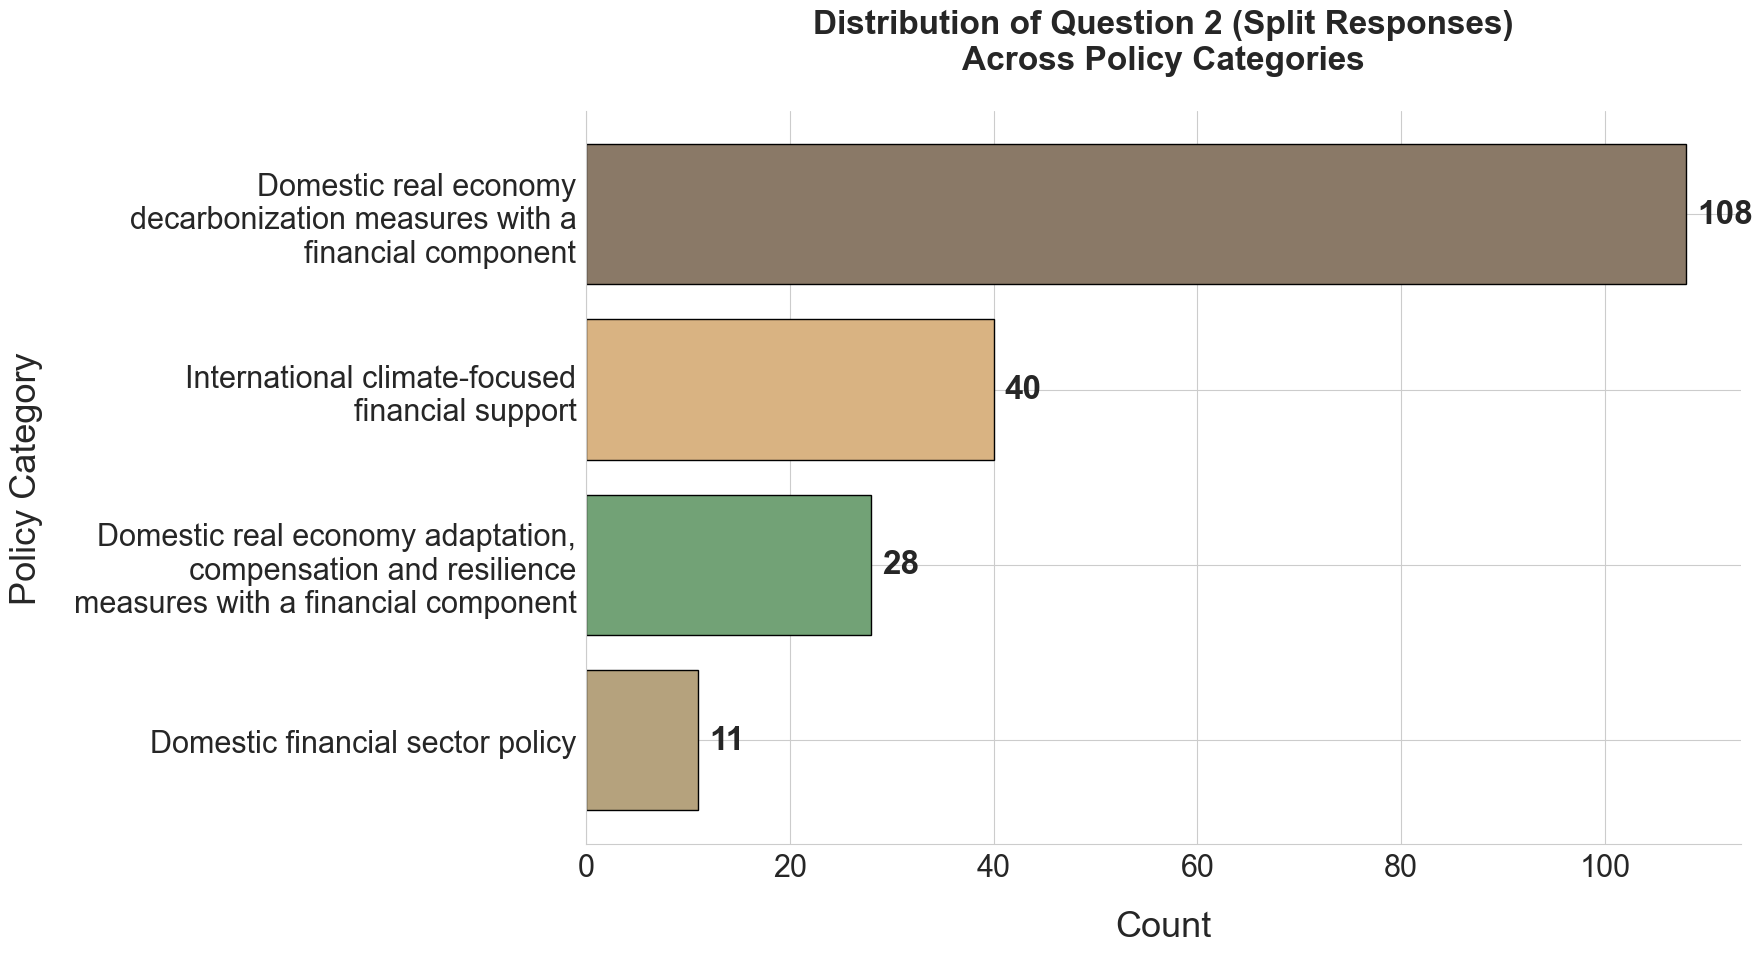

In [731]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import textwrap

# Extract unique policy categories from the 'question_2' column
def normalize_category(cat):
    if not cat or not isinstance(cat, str):
        return None
    cat = cat.strip()
    # Unify international support labels
    if cat.startswith("International climate-focused financial"):
        return "International climate-focused financial support"
    # Unify adaptation/compensation
    if (
        cat.startswith("Domestic real economy adaptation and compensation measures")
        or cat.startswith("Domestic real economy adaptation, compensation and resilience measures")
    ):
        return "Domestic real economy adaptation, compensation and resilience measures with a financial component"
    return cat

# Get the unique (non-null) values as a flat list, normalized
all_policy_values = [normalize_category(v) for v in question_2_df['question_2'] if v and str(v).strip()]
policy_value_counts = Counter([v for v in all_policy_values if v])

# Print all unique categories found (sorted)
unique_categories = sorted(set(policy_value_counts.keys()))
print("All normalized categories found in 'question_2' splits:")
for cat in unique_categories:
    print(cat)

# Prettier and bigger plot with counts at end of bars
sns.set_style("whitegrid")
# Bigger font sizes, especially for ytick labels (category labels)
plt.rcParams.update({
    'font.size': 22,
    'axes.titlesize': 28,
    'axes.labelsize': 24,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 18
})

categories = list(policy_value_counts.keys())
counts = list(policy_value_counts.values())

# Sort categories by counts descending for a prettier plot
sorted_pairs = sorted(zip(counts, categories), reverse=True)
sorted_counts, sorted_categories = zip(*sorted_pairs)

# Wrap the text in the y-labels to 35 chars
wrapped_categories = ["\n".join(textwrap.wrap(c, width=35, break_long_words=False)) for c in sorted_categories]

fig, ax = plt.subplots(figsize=(18, 10))
bars = ax.barh(
    y=wrapped_categories,
    width=sorted_counts,
    color=COLOR_SCHEMA[:len(wrapped_categories)],
    height=0.8,
    edgecolor="k"
)
ax.set_xlabel("Count", fontsize=26, labelpad=20)
ax.set_ylabel("Policy Category", fontsize=26, labelpad=22)
ax.set_title("Distribution of Question 2 (Split Responses)\nAcross Policy Categories", fontsize=24, fontweight='bold', pad=30)
ax.invert_yaxis()

# Add count labels to the end of each bar (right aligned)
for bar, count in zip(bars, sorted_counts):
    ax.text(
        bar.get_width() + max(sorted_counts)*0.01,
        bar.get_y() + bar.get_height() / 2,
        str(count),
        va='center',
        ha='left',
        fontsize=24,
        fontweight='bold'
    )

# Remove unnecessary borders for aesthetics
sns.despine()
plt.tight_layout()
plt.show()


### Question 3

**Question 3 Visualization**

In [782]:
# Remove the row with unique_id 'lf0vaU6VpW26FhQV' from combined_df
fix_uid = "lf0vaU6VpW26FhQV"
combined_df = combined_df[combined_df["unique_id"] != fix_uid]


In [749]:
question_3_df = combined_df.loc[:, ['unique_id', 'question_3']]

In [750]:
question_3_df.to_csv('../results/question_3_df.csv', index=False)

In [751]:
question_3_df = pd.read_csv('../results/question_3_df_healed.csv')

In [752]:
question_3_split = split_column_to_multiple(question_3_df, 'question_3')

In [753]:
question_3_split

,unique_id,question_3
0,3Oahxp3pihpVDQVt,Product: Debt instruments
1,tnaWzSNVgSLTv7XX,Entity: Public bodies
2,K96A0SZrnego6D4a,Entuty: Sovereign funds and investment-focused...
3,K96A0SZrnego6D4a,Entity: Non-financial corporations (excluding ...
4,K96A0SZrnego6D4a,Entity: Private investment fund managers
...,...,...
545,nUz7pimFcfuW0mEp,Entities: Non-financial corporations (excludin...
546,nUz7pimFcfuW0mEp,Entities: Public bodies (excluding state-owned...
547,HntYeSkM5RJIhfdb,Products: Debt instruments
548,HntYeSkM5RJIhfdb,Products: Equity instruments


In [754]:
question_3_split[['category', 'subject']] = question_3_split['question_3'].str.split(':', n=1, expand=True)

In [755]:
# Remove rows where question_3 is blank before displaying
question_3_split = question_3_split[question_3_split['question_3'].notnull() & (question_3_split['question_3'].str.strip() != "")]

In [756]:
# Parse categories and subjects from the schema, which is a list of dicts, see @file_context_0
category_values = []
subject_values = []

for entry in prompts.question_3_json_schema:
    category = entry.get("category")
    subject = entry.get("subject")
    if category and category.lower() not in [c.lower() for c in category_values]:
        category_values.append(category)
    if subject and subject.lower() not in [s.lower() for s in subject_values]:
        subject_values.append(subject)

# Lowercase versions for normalization
category_values_lower = [c.lower() for c in category_values]
subject_values_lower = [s.lower() for s in subject_values]

import numpy as np
for idx, row in question_3_split.iterrows():
    category = row.get("category")
    subject = row.get("subject")
    
    # Clean up whitespace and handle NaN
    str_cat = str(category).strip() if category is not None else ""
    str_sub = str(subject).strip() if subject is not None else ""

    # Normalize for checks
    norm_cat = str_cat.lower()
    norm_sub = str_sub.lower()

    # Determine if category or subject is missing (None, np.nan, or empty after trim)
    is_cat_missing = pd.isna(category) or norm_cat == "" or norm_cat == "none"
    is_sub_missing = pd.isna(subject) or norm_sub == "" or norm_sub == "none"
    
    # Only consider rows where either is missing and the other has non-empty string
    if is_cat_missing and not is_sub_missing:
        check_string = str_sub.lstrip(":").strip()
        norm_check = check_string.lower()
        # See if check_string is in category or subject lists (case-insensitive, normalized)
        in_category = norm_check in category_values_lower
        in_subject = norm_check in subject_values_lower
        if in_category:
            print(f"✅ Row {idx} contains '{check_string}' which is {check_string} category")
        elif in_subject:
            print(f"✅ Row {idx} contains '{check_string}' which is {check_string} subject")
        else:
            print(f"⚠️ Row {idx} contains '{check_string}' which is not in category or subject lists")
    elif is_sub_missing and not is_cat_missing:
        check_string = str_cat.lstrip(":").strip()
        norm_check = check_string.lower()
        in_category = norm_check in category_values_lower
        in_subject = norm_check in subject_values_lower
        if in_category:
            print(f"✅ Row {idx} contains '{check_string}' which is {check_string} category")
        elif in_subject:
            print(f"✅ Row {idx} contains '{check_string}' which is {check_string} subject")
        else:
            print(f"⚠️ Row {idx} contains '{check_string}' which is not in category or subject lists")



In [757]:
# Create a dictionary mapping subjects to categories from prompts.question_3_json_schema
subject_to_category = {}
if hasattr(prompts, "question_3_json_schema") and isinstance(prompts.question_3_json_schema, list):
    for item in prompts.question_3_json_schema:
        subject = item.get("subject") 
        category = item.get("category")
        if isinstance(subject, str) and isinstance(category, str):
            subject_to_category[subject.strip()] = category.strip()


In [758]:
subject_to_category

{'Guarantees': 'Products',
 'Grants': 'Products',
 'Equity instruments': 'Products',
 'Debt instruments': 'Products',
 'Insurance products': 'Products',
 'Investment funds (as products)': 'Products',
 'Derivatives': 'Products',
 'Environmental markets': 'Products',
 'Insurance': 'Products',
 'Other forms of direct payments': 'Products',
 'Public bodies (excluding state-owned enterprises)': 'Entities',
 'Non-financial corporations (excluding state-owned enterprises)': 'Entities',
 'Commercial banks, cooperatives, credit unions and other deposit-taking institutions': 'Entities',
 'Private institutional investors': 'Entities',
 'Private investment fund managers': 'Entities',
 'Insurers and reinsurers (not as investors)': 'Entities',
 'Private sector asset managers': 'Entities',
 'Public pension plan managers': 'Entities',
 'Sovereign funds and investment-focused state-owned entities': 'Entities',
 'Non-financial state-owned enterprises': 'Entities',
 'Development banks': 'Entities',
 'Exp

In [759]:
# For rows in question_3_split where "subject" is None, move "category" value to "subject", 
# then use subject_to_category (built from prompts.question_3_json_schema) to look up the proper category.

# Ensure category/subject columns exist
if "category" in question_3_split.columns and "subject" in question_3_split.columns:
    for idx, row in question_3_split.iterrows():
        # Check if subject is missing (None, nan, "", or "none")
        if pd.isna(row["subject"]) or str(row["subject"]).strip().lower() in ("", "none"):
            # Move category value to subject
            subject_val = row["category"]  # can be None/np.nan/a string
            question_3_split.at[idx, "subject"] = subject_val

            # Now, look up the appropriate category using subject_to_category
            str_subj = str(subject_val).strip() if subject_val is not None else ""
            # Find and set the category if available in the mapping
            matched_category = subject_to_category.get(str_subj, None)
            if matched_category is not None:
                question_3_split.at[idx, "category"] = matched_category


In [760]:
# Collapse/consolidate multiple category labels for question_3_split

# Define new mapping based on the prompt's rules
category_collapse_map = {
    "Entities": "Entities",
    "Entity": "Entities",
    "Entuty": "Entities",
    "Products": "Products",
    "Product": "Products", 
    "Individuals1": "Individuals"
}

# Apply the mapping ONLY for keys specified; others remain as-is unless additional remapping required
question_3_split["category"] = question_3_split["category"].replace(category_collapse_map)


In [761]:
question_3_split.category.value_counts()

category
Entities    427
Products    117
Others        6
Name: count, dtype: int64

In [762]:
question_3_split["subject"] = question_3_split["subject"].apply(lambda x: str(x).strip().title() if pd.notnull(x) else x)


In [768]:
# Ensure subject_to_category keys are Title Cased for comparison
subject_to_category_titled = {str(k).title(): v for k, v in subject_to_category.items()}

unmatched_subjects = []
for subj in question_3_split["subject"].unique():
    # Ignore NaN or None
    subj_str = str(subj).title() if pd.notnull(subj) else None
    if subj_str not in subject_to_category_titled:
        unmatched_subjects.append(subj_str)
if unmatched_subjects:
    print("Subjects not found in subject_to_category map:")
    for s in unmatched_subjects:
        print(s)
else:
    print("All subjects are present in subject_to_category map.")

All subjects are present in subject_to_category map.


In [767]:
# Apply subject correction map and drop rows where subject is Others

healing_map = {
    'Non-Financial Corporations': 'Non-financial corporations (excluding state-owned enterprises)',
    'Non-Financial Corporations (Excluding State-Owned Enterprises': 'Non-financial corporations (excluding state-owned enterprises)',
    'Public Bodies': 'Public bodies (excluding state-owned enterprises)',
}

# Apply the healing_map to the subject column
question_3_split["subject"] = question_3_split["subject"].replace(healing_map)

# Drop rows where subject is 'Others' (case insensitive, with or without leading/trailing spaces)
question_3_split = question_3_split[question_3_split["subject"].str.strip().str.lower() != "others"]



In [769]:
# Print length before deduplication
print("\nLength before deduplication:", len(question_3_split))

# Remove duplicates where unique_id, category, and subject are all the same
question_3_split = question_3_split.drop_duplicates(subset=["unique_id", "category", "subject"])

# Print length after deduplication
print("Length after deduplication:", len(question_3_split))

question_3_split


Length before deduplication: 546
Length after deduplication: 546


,unique_id,question_3,category,subject
0,3Oahxp3pihpVDQVt,Product: Debt instruments,Products,Debt Instruments
1,tnaWzSNVgSLTv7XX,Entity: Public bodies,Entities,Public bodies (excluding state-owned enterprises)
2,K96A0SZrnego6D4a,Entuty: Sovereign funds and investment-focused...,Entities,Sovereign Funds And Investment-Focused State-O...
3,K96A0SZrnego6D4a,Entity: Non-financial corporations (excluding ...,Entities,Non-financial corporations (excluding state-ow...
4,K96A0SZrnego6D4a,Entity: Private investment fund managers,Entities,Private Investment Fund Managers
...,...,...,...,...
545,nUz7pimFcfuW0mEp,Entities: Non-financial corporations (excludin...,Entities,Non-financial corporations (excluding state-ow...
546,nUz7pimFcfuW0mEp,Entities: Public bodies (excluding state-owned...,Entities,Public Bodies (Excluding State-Owned Enterprises)
547,HntYeSkM5RJIhfdb,Products: Debt instruments,Products,Debt Instruments
548,HntYeSkM5RJIhfdb,Products: Equity instruments,Products,Equity Instruments


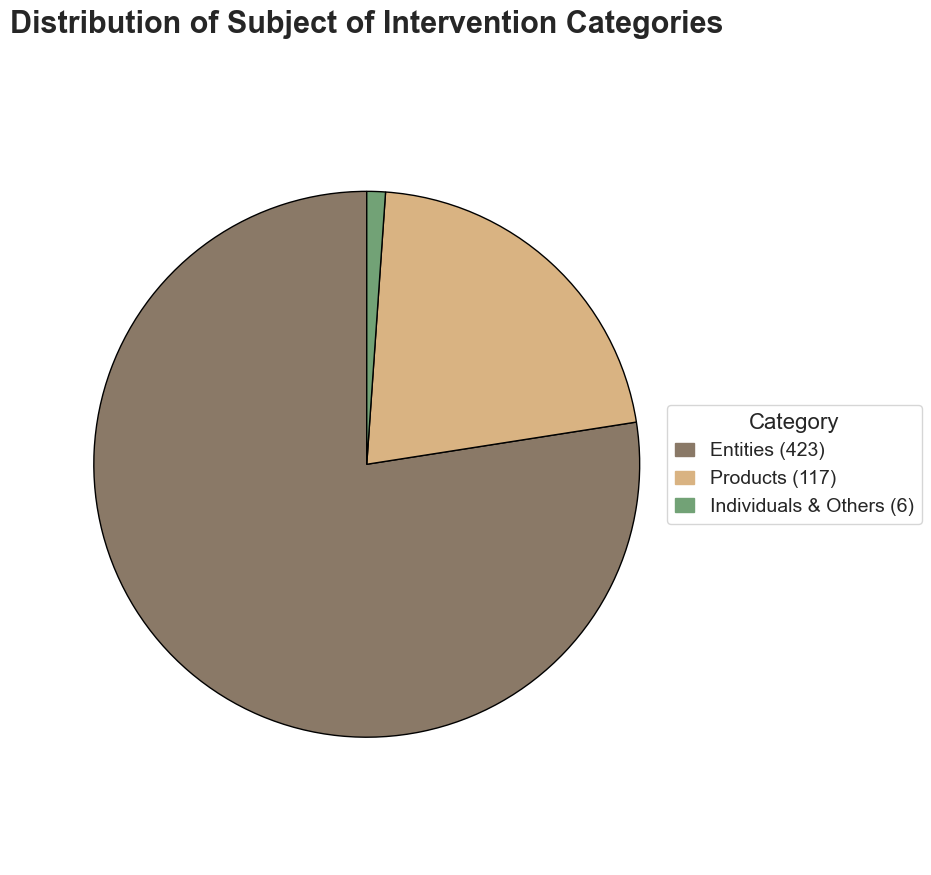

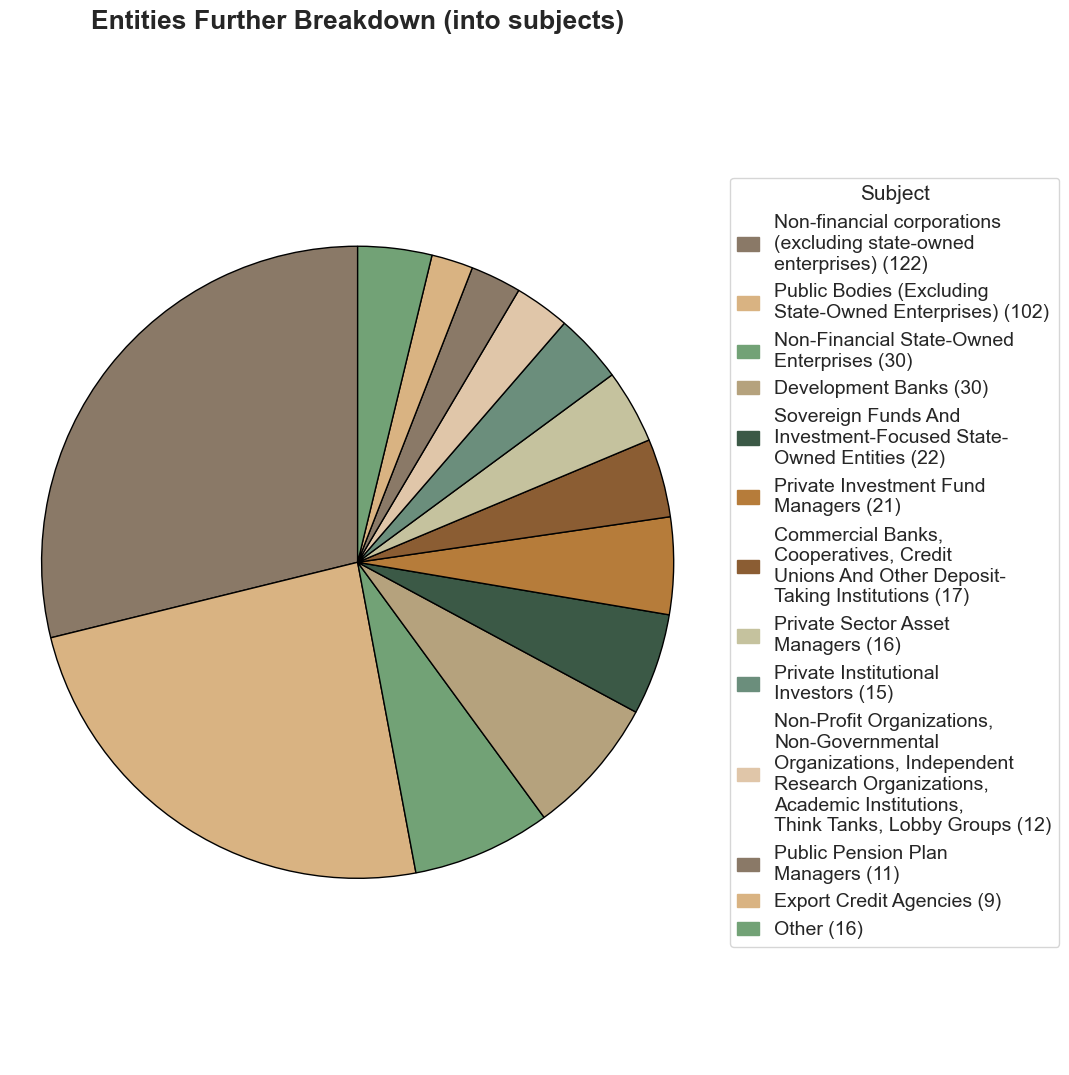

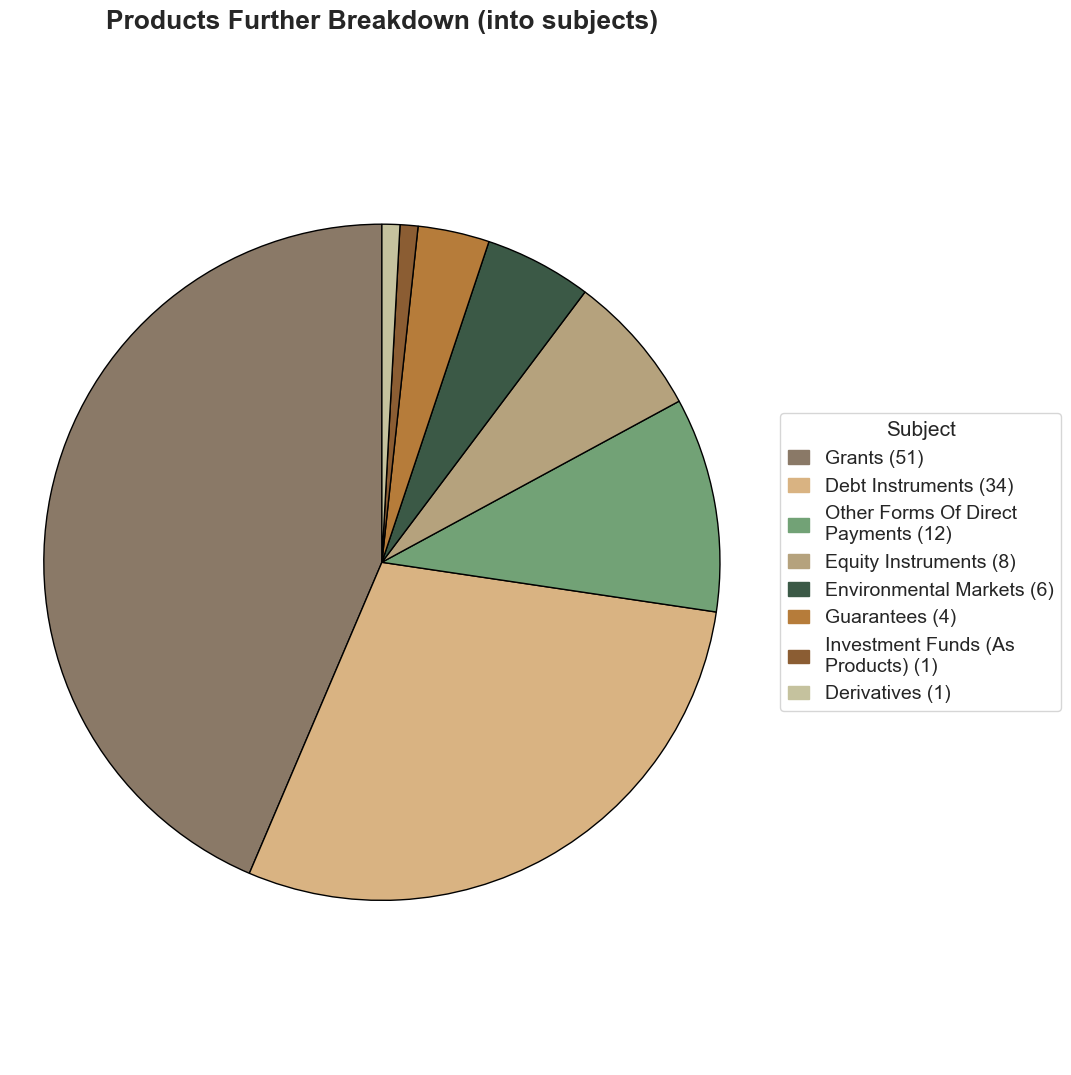

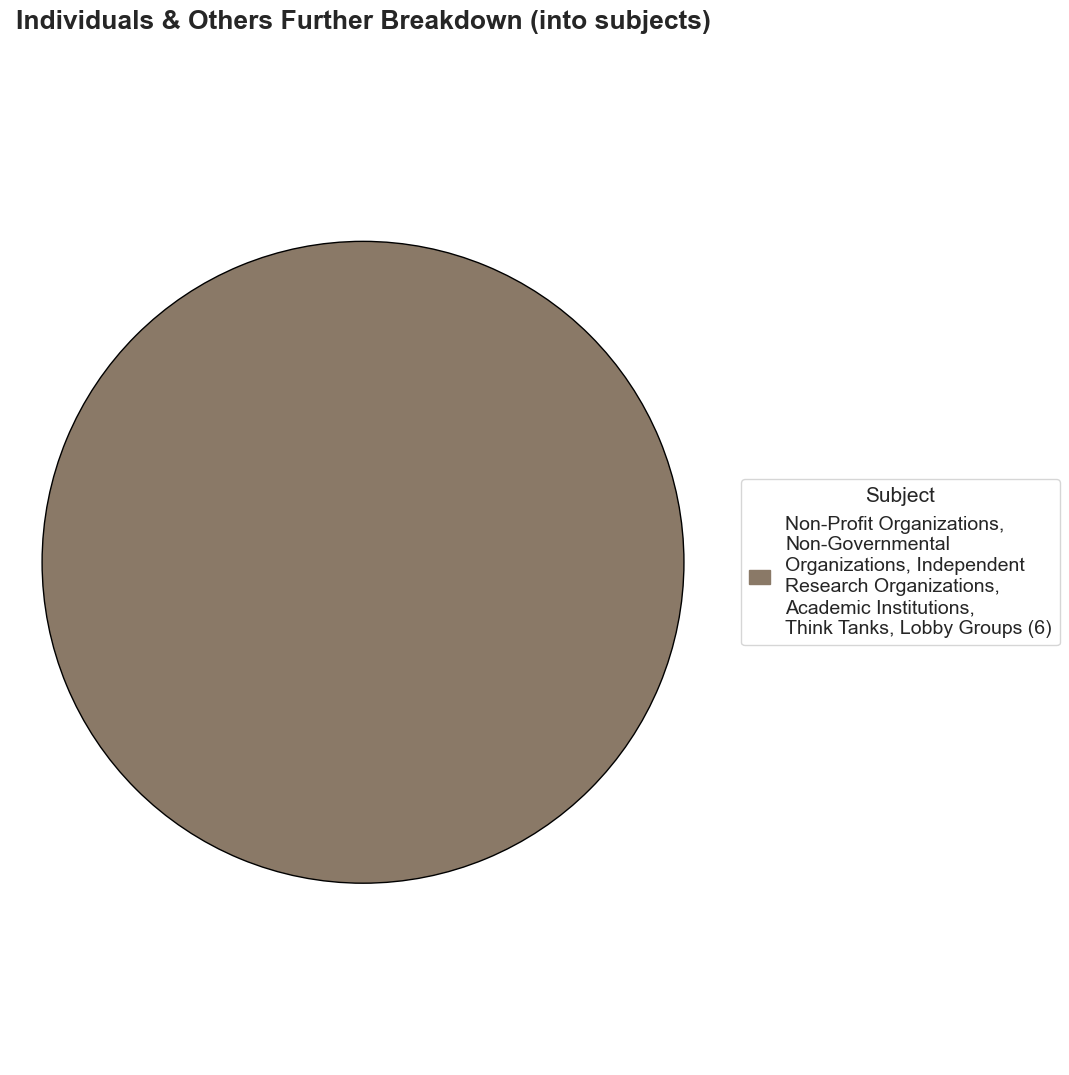

In [770]:
# Pie charts of categories and subjects within categories,
# with readable box key legend indexed by slice color.
# Text is moved to the legend. No percentages on the pie chart itself.

import matplotlib.pyplot as plt
import textwrap
import matplotlib.patches as mpatches
import numpy as np

def wrap_labels(labels, width):
    """Wrap each label string to a max width using textwrap."""
    wrapped_labels = []
    for lab in labels:
        str_lab = "" if pd.isnull(lab) else str(lab)
        wrapped = "\n".join(textwrap.wrap(str_lab, width=width, break_long_words=False, replace_whitespace=True))
        wrapped_labels.append(wrapped)
    return wrapped_labels

# Set plotting style and font sizes
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 15,
    'axes.titlesize': 21,
    'axes.labelsize': 16,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 14
})

# --- 1. Pie chart of categories with legend (box key) ---

if 'category' in question_3_split.columns:
    # Combine Individuals + Others
    pie_category_map = {
        'Individuals': 'Individuals & Others',
        'Others': 'Individuals & Others'
    }
    cat_plot_series = question_3_split['category'].replace(pie_category_map)
    cat_counts = cat_plot_series.value_counts()

    cats_for_palette = cat_counts.index.tolist()
    # color assignment
    if set(['Entities', 'Products', 'Individuals & Others']).issubset(cats_for_palette):
        palette_dict = {
            'Entities': COLOR_SCHEMA[0],
            'Products': COLOR_SCHEMA[1],
            'Individuals & Others': COLOR_SCHEMA[2]
        }
        pie_colors = [palette_dict[cat] for cat in cats_for_palette]
    else:
        pie_colors = COLOR_SCHEMA[:len(cat_counts)]

    pie_category_labels = wrap_labels(cat_counts.index, width=20)
    legend_labels = [f'{label} ({count})' for label, count in zip(cat_counts.index, cat_counts.values)]

    fig, ax = plt.subplots(figsize=(9,9))
    wedges, texts = ax.pie(
        cat_counts.values,
        labels=None,  # Hide labels on pie
        autopct=None, # No percentages
        startangle=90,
        colors=pie_colors,
        textprops={'fontsize': 13, 'fontweight': 'bold'},
        wedgeprops=dict(edgecolor='k')
    )
    ax.set_title(
        "Distribution of Subject of Intervention Categories",
        fontsize=22, fontweight='bold', pad=22
    )
    ax.axis('equal')
    # legend (patches length = pie_colors length = data length)
    patches = [mpatches.Patch(color=pie_colors[i], label=pie_category_labels[i] + f" ({cat_counts.values[i]})") for i in range(len(cat_counts))]
    plt.legend(
        handles=patches,
        loc='center left',
        bbox_to_anchor=(1.00, 0.5),
        borderaxespad=0.,
        handlelength=1.0,
        title="Category",
        title_fontsize=16
    )
    plt.tight_layout()
    plt.show()

# --- 2. Pie charts of subjects within each main (non-individual/other) category, with box key legend, NO percentages ---

main_cats = ['Entities', 'Products', 'Individuals & Others']

for i, main_cat in enumerate(main_cats[:2] + ['Individuals & Others']):
    if main_cat == 'Individuals & Others':
        subjects_mask = cat_plot_series.isin(['Individuals & Others'])
    else:
        subjects_mask = cat_plot_series == main_cat

    if 'subject' in question_3_split.columns and subjects_mask.any():
        subj_counts = question_3_split.loc[subjects_mask, 'subject'].value_counts()
        top_n = 12

        # Optionally group lesser counts as "Other"
        if len(subj_counts) > top_n:
            top_subjects = subj_counts[:top_n]
            other_sum = subj_counts[top_n:].sum()
            subj_counts = pd.concat([top_subjects, pd.Series({'Other': other_sum})])

        pie_subject_labels = wrap_labels(subj_counts.index, width=26)
        color_ct = len(subj_counts)
        if len(COLOR_SCHEMA) < color_ct:
            from itertools import cycle, islice
            pie_subject_colors = list(islice(cycle(COLOR_SCHEMA), color_ct))
        else:
            pie_subject_colors = COLOR_SCHEMA[:color_ct]

        legend_labels = [f'{label} ({count})'
                         for label, count in zip(pie_subject_labels, subj_counts.values)]

        fig, ax = plt.subplots(figsize=(11,11))
        wedges, texts = ax.pie(
            subj_counts.values,
            labels=None,  # Hide labels on pie to avoid clutter
            autopct=None, # No percentages
            startangle=90,
            colors=pie_subject_colors,
            textprops={'fontsize': 8, 'fontweight': 'bold'},
            wedgeprops=dict(edgecolor='k')
        )
        ax.set_title(
            f"{main_cat} Further Breakdown (into subjects)", fontsize=19, fontweight='bold', pad=22
        )
        ax.axis('equal')
        patches = [mpatches.Patch(color=pie_subject_colors[i], label=legend_labels[i])
                   for i in range(min(len(pie_subject_colors), len(legend_labels)))]
        plt.legend(
            handles=patches,
            loc='center left',
            bbox_to_anchor=(1.035, 0.5),
            borderaxespad=0.,
            handlelength=1.1,
            title="Subject",
            title_fontsize=15
        )
        plt.tight_layout()
        plt.show()

___

## Question 4

In [788]:
question_4_df = combined_df.loc[:, ['unique_id', 'question_4']]

In [789]:
question_4_df

,unique_id,question_4
0,3Oahxp3pihpVDQVt,Coordination; information asymmetry
1,tnaWzSNVgSLTv7XX,Public goods
2,K96A0SZrnego6D4a,Myopia; missing markets; externalities.
3,G6RmGheTDI0EhzXd,"Externalities, public goods"
4,rxkDG0Ai5LbWIkAw,"Externalities, public goods"
...,...,...
151,ldyDWFana7Mtg9DA,Information asymmetry; Coordination
152,epT5n3eO1Zykzsd7,Public goods; Externalities; Coordination
153,4F1rb0vmsfkNshQg,Public goods; Externalities
154,nUz7pimFcfuW0mEp,Public goods; Coordination


In [794]:
# First, split by ";" (as in split_column_to_multiple)
question_4_split = split_column_to_multiple(question_4_df, 'question_4')

# Now split rows where question_4 equals "Externalities, public goods" (or similar variations) into two rows: "Externalities" and "Public goods"
# Also, if it exactly matches "Coordination and information asymmetry" (ignoring case/whitespace), split into "Coordination" and "Information asymmetry"
import pandas as pd

def expand_special_cases(df):
    rows = []
    for idx, row in df.iterrows():
        q = row['question_4']
        if isinstance(q, str):
            q_clean = q.strip().lower().replace(" ", "")
            if q_clean in [
                "externalities,publicgoods",
                "externalities;publicgoods"
            ]:
                for val in ["Externalities", "Public goods"]:
                    new_row = row.copy()
                    new_row['question_4'] = val
                    rows.append(new_row)
                continue
            # Hard code for "Coordination and information asymmetry"
            if q.strip().lower() == "coordination and information asymmetry":
                for val in ["Coordination", "Information asymmetry"]:
                    new_row = row.copy()
                    new_row['question_4'] = val
                    rows.append(new_row)
                continue
        rows.append(row)
    return pd.DataFrame(rows)

question_4_split = expand_special_cases(question_4_split)

In [795]:
question_4_split.question_4.value_counts()

question_4
Public goods             118
Externalities            114
Coordination              71
Information asymmetry     55
Missing markets           31
Myopia                    20
Systemic risks             8
information asymmetry      3
myopia                     3
missing markets            1
externalities.             1
Public Goods               1
systemic risk.             1
systemic risk              1
coordination               1
Name: count, dtype: int64

In [796]:
# Clean and combine similar answers in question_4_split['question_4']

# Define mapping from variant forms to canonical categories
canonical_map = {
    "information asymmetry": "Information asymmetry",
    "myopia": "Myopia",
    "missing markets": "Missing markets",
    "externalities.": "Externalities",
    "Public Goods": "Public goods",
    "systemic risk.": "Systemic risks",
    "systemic risk": "Systemic risks",
    "coordination": "Coordination",
}

# Standardize strings, strip, and map to canonical values where available
question_4_split["question_4"] = (
    question_4_split["question_4"]
    .apply(lambda x: canonical_map.get(str(x).strip(), x) if pd.notnull(x) else x)
)



All categories found in 'question_4' splits:
Coordination
Externalities
Information asymmetry
Missing markets
Myopia
Public goods
Systemic risks


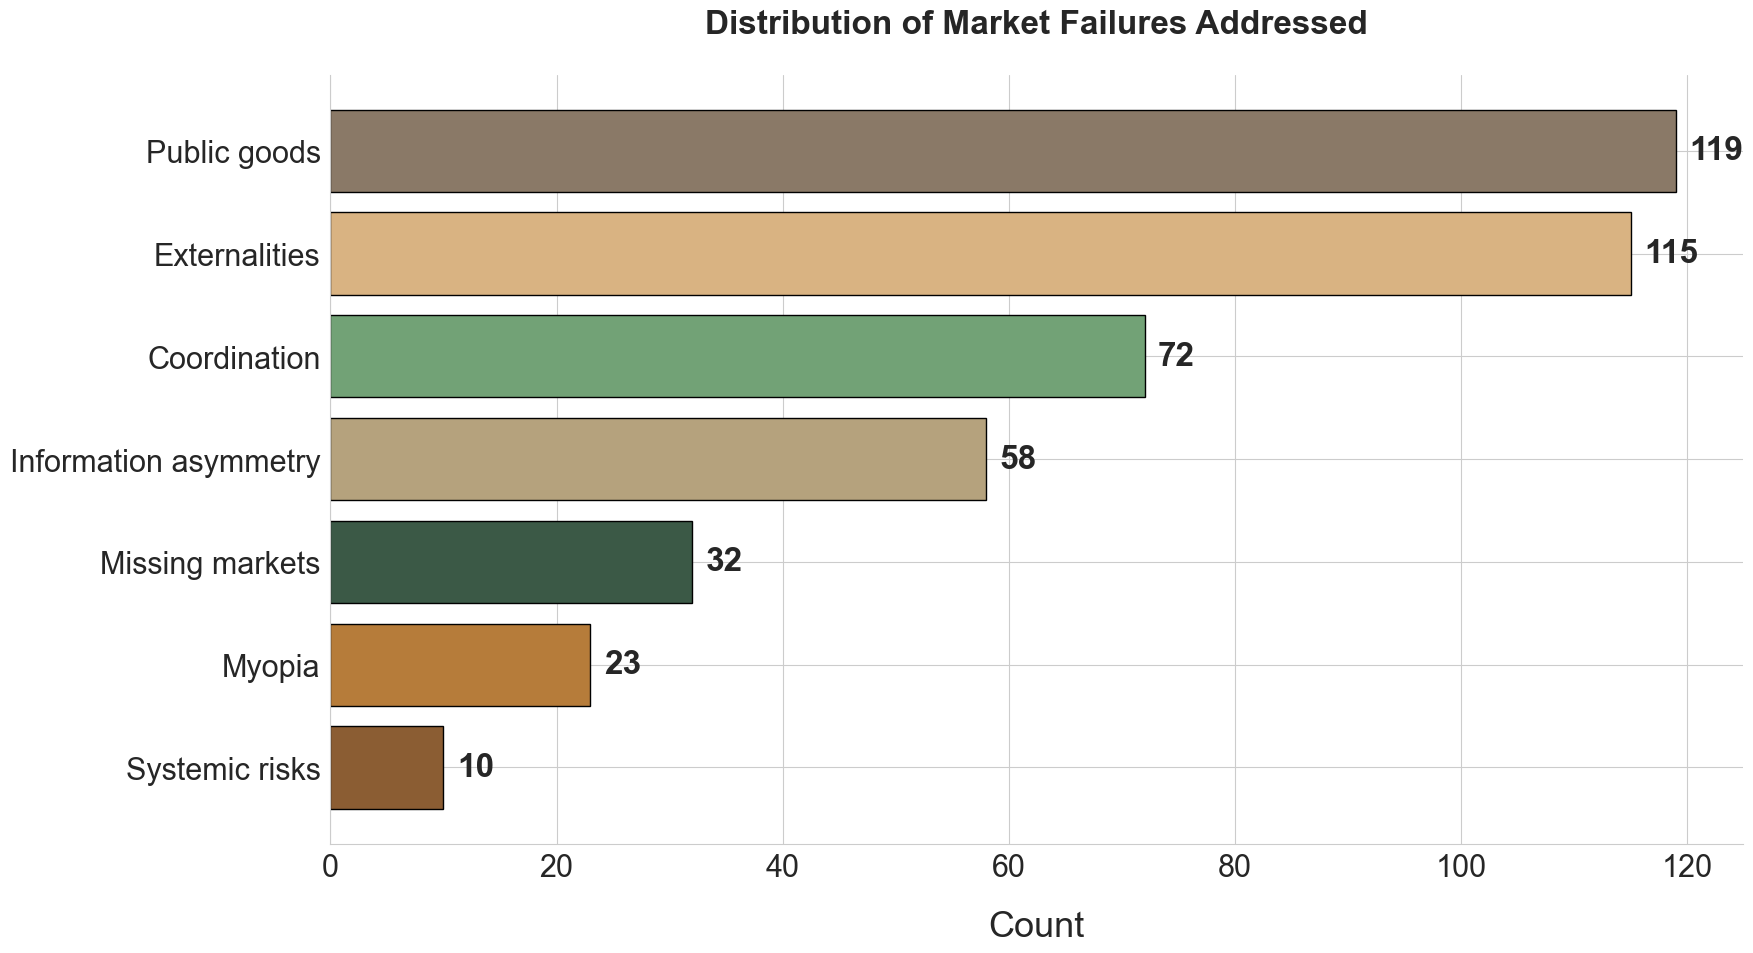

In [801]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import textwrap

# Get the unique (non-null) values as a flat list (no normalization)
all_question4_values = [v for v in question_4_split['question_4'] if pd.notnull(v) and str(v).strip()]
question4_value_counts = Counter(all_question4_values)

# Print all unique categories found (sorted)
unique_q4_categories = sorted(set(question4_value_counts.keys()))
print("All categories found in 'question_4' splits:")
for cat in unique_q4_categories:
    print(cat)

# Prettier and bigger plot with counts at end of bars
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 22,
    'axes.titlesize': 28,
    'axes.labelsize': 24,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 18
})

categories = list(question4_value_counts.keys())
counts = list(question4_value_counts.values())

# Sort categories by counts descending for better visualization
sorted_pairs = sorted(zip(counts, categories), reverse=True)
sorted_counts, sorted_categories = zip(*sorted_pairs)

# Wrap the text in the y-labels to 35 chars
wrapped_categories = ["\n".join(textwrap.wrap(c, width=35, break_long_words=False)) for c in sorted_categories]

fig, ax = plt.subplots(figsize=(18, 10))
bars = ax.barh(
    y=wrapped_categories,
    width=sorted_counts,
    color=COLOR_SCHEMA[:len(wrapped_categories)],
    height=0.8,
    edgecolor="k"
)
ax.set_xlabel("Count", fontsize=26, labelpad=20)
ax.set_title("Distribution of Market Failures Addressed", fontsize=24, fontweight='bold', pad=30)
ax.invert_yaxis()

# Add count labels to the end of each bar (right aligned)
for bar, count in zip(bars, sorted_counts):
    ax.text(
        bar.get_width() + max(sorted_counts)*0.01,
        bar.get_y() + bar.get_height() / 2,
        str(count),
        va='center',
        ha='left',
        fontsize=24,
        fontweight='bold'
    )

# Remove unnecessary borders for aesthetics
sns.despine()
plt.tight_layout()
plt.show()


____

## Question 5

In [942]:
question_5_df = combined_df.loc[:, ['unique_id', 'question_5']]

In [943]:
question_5_df.to_csv('../results/question_5_df.csv', index=False)

In [944]:
# Replace the value in 'question_5' for unique_id 'DAum9XBl9BxXQdTP'
question_5_df.loc[question_5_df['unique_id'] == 'DAum9XBl9BxXQdTP', 'question_5'] = (
    "Command-and-control: risk management, behavioural duties and governance; Informational: mandatory information disclosure"
)

In [945]:
question_5_split = split_column_to_multiple(question_5_df, 'question_5')

In [946]:
question_5_split[['category', 'policy']] = question_5_split['question_5'].str.split(':', n=1, expand=True)

In [947]:
# Some manual healing

# Fix None values in 'policy incentive' as before
mask_none_policy = question_5_split['policy'].isnull()
question_5_split.loc[mask_none_policy, 'policy'] = "Mandatory information disclosure (product- or entity-level)"
question_5_split.loc[mask_none_policy, 'category'] = "Informational"

# Change 'category' from 'Policy layer' to 'Command-and-control'
mask_policy_layer = question_5_split['category'].str.strip().str.lower() == 'policy layer'
question_5_split.loc[mask_policy_layer, 'category'] = 'Command-and-control'

# Fix incorrect concatenated value per prompt
# Find: Risk Management, Behavioural Duties And Governanceinformational: Mandatory Information Disclosure
# Change to: Risk Management, Behavioural Duties And Governance; Informational: Mandatory Information Disclosure
faulty_string = "Risk Management, Behavioural Duties And Governanceinformational: Mandatory Information Disclosure"
corrected_string = "Risk Management, Behavioural Duties And Governance; Informational: Mandatory Information Disclosure"
mask_concat_issue = question_5_split['policy'].str.strip() == faulty_string
question_5_split.loc[mask_concat_issue, 'policy'] = corrected_string

# Optionally, print diagnostics if you need
print("Updated rows where 'category' was Policy layer (now Command-and-control):")
print(question_5_split[mask_policy_layer])


Updated rows where 'category' was Policy layer (now Command-and-control):
            unique_id                                        question_5  \
170  pSqNPdIP2Gr5HetI  Policy layer: Investment mandates or constraints   

                category                               policy  
170  Command-and-control   Investment mandates or constraints  


In [948]:
# Create a dictionary mapping subjects to policy incentives from prompts.question_5_json_schema
policy_to_category = {}
if hasattr(prompts, "question_5_json_schema") and isinstance(prompts.question_5_json_schema, list):
    for item in prompts.question_5_json_schema:
        subject = item.get("policy_instrument") 
        category = item.get("category")
        if isinstance(subject, str) and isinstance(category, str):
            policy_to_category[subject.strip()] = category.strip()


In [949]:
question_5_split.category.value_counts()

category
Market-based           142
Informational           53
Command-and-control     23
Hybrid                   6
Name: count, dtype: int64

In [950]:
# Heal the 'policy' column by trimming leading/trailing whitespace,
# replace "Mandatory Information Disclosure" (any case/whitespace) with "Mandatory information disclosure (product- or entity-level)",
# and replace "Labeling And Standards" (any case/whitespace) with "Labelling and standards".
# Leave other content unchanged.
question_5_split['policy'] = (
    question_5_split['policy']
        .astype(str)
        .str.strip()
        .replace(
            [
                r'^mandatory information disclosure$',
                r'^labeling and standards$'
            ],
            [
                "Mandatory information disclosure (product- or entity-level)",
                "Labelling and standards"
            ],
            regex=True
        )
)


In [951]:
# Ensure subject_to_category keys are Title Cased for comparison
policy_to_category_titled = {str(k).title(): v for k, v in policy_to_category.items()}

unmatched_subjects = []
for subj in question_5_split["policy"].unique():
    # Ignore NaN or None
    subj_str = str(subj).title() if pd.notnull(subj) else None
    if subj_str not in policy_to_category_titled:
        unmatched_subjects.append(subj_str)
if unmatched_subjects:
    print("Subjects not found in subject_to_category map:")
    for s in unmatched_subjects:
        print(s)
else:
    print("All subjects are present in subject_to_category map.")

All subjects are present in subject_to_category map.


In [956]:
# Heal the 'policy' column by standardizing certain values.
policy_healing = {
    'market infrastructure': 'Market infrastructure',
    'concessional finance, subsidies and grants': 'Concessional finance, subsidies and grants', 'risk management, behavioural duties and governance': 'Risk management, behavioural duties and governance'
}

# Apply the mapping to the 'policy' column (case-insensitive, after stripping).
question_5_split['policy'] = (
    question_5_split['policy']
        .astype(str)
        .str.strip()
        .apply(lambda x: policy_healing.get(x.lower(), x))
)

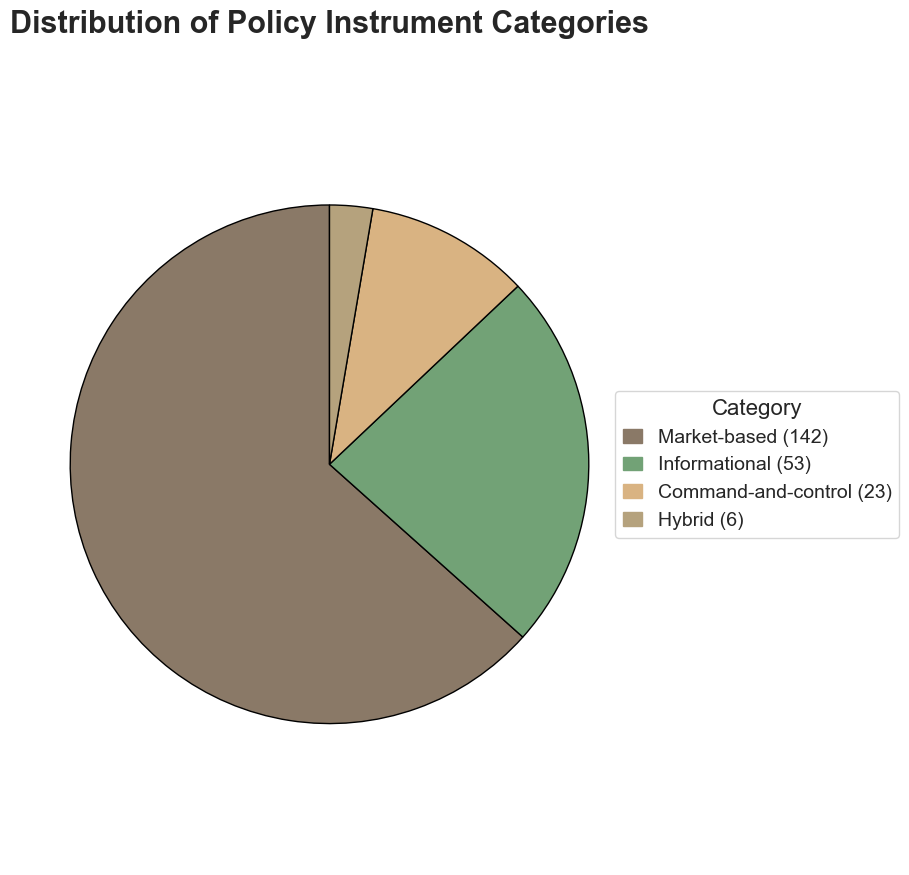

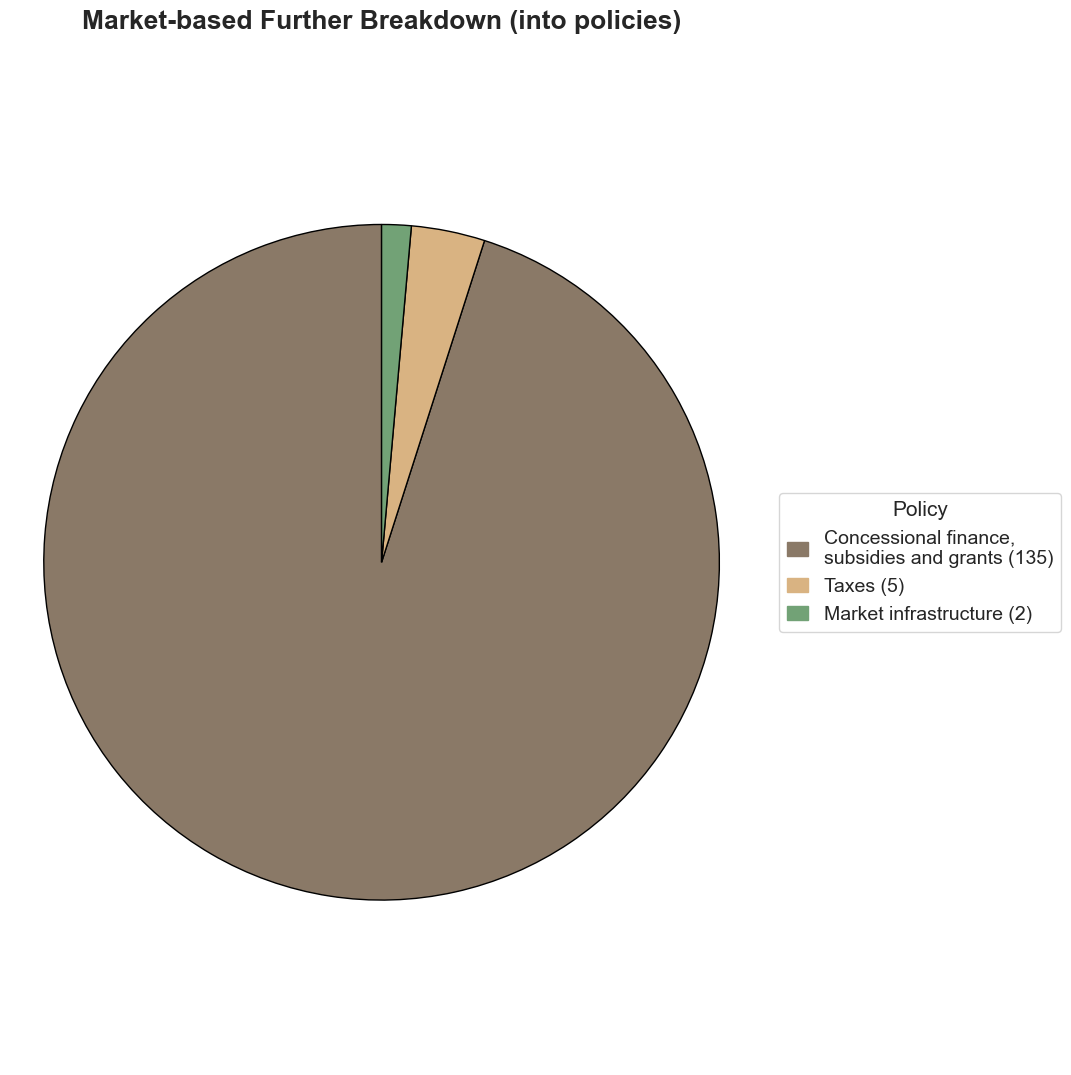

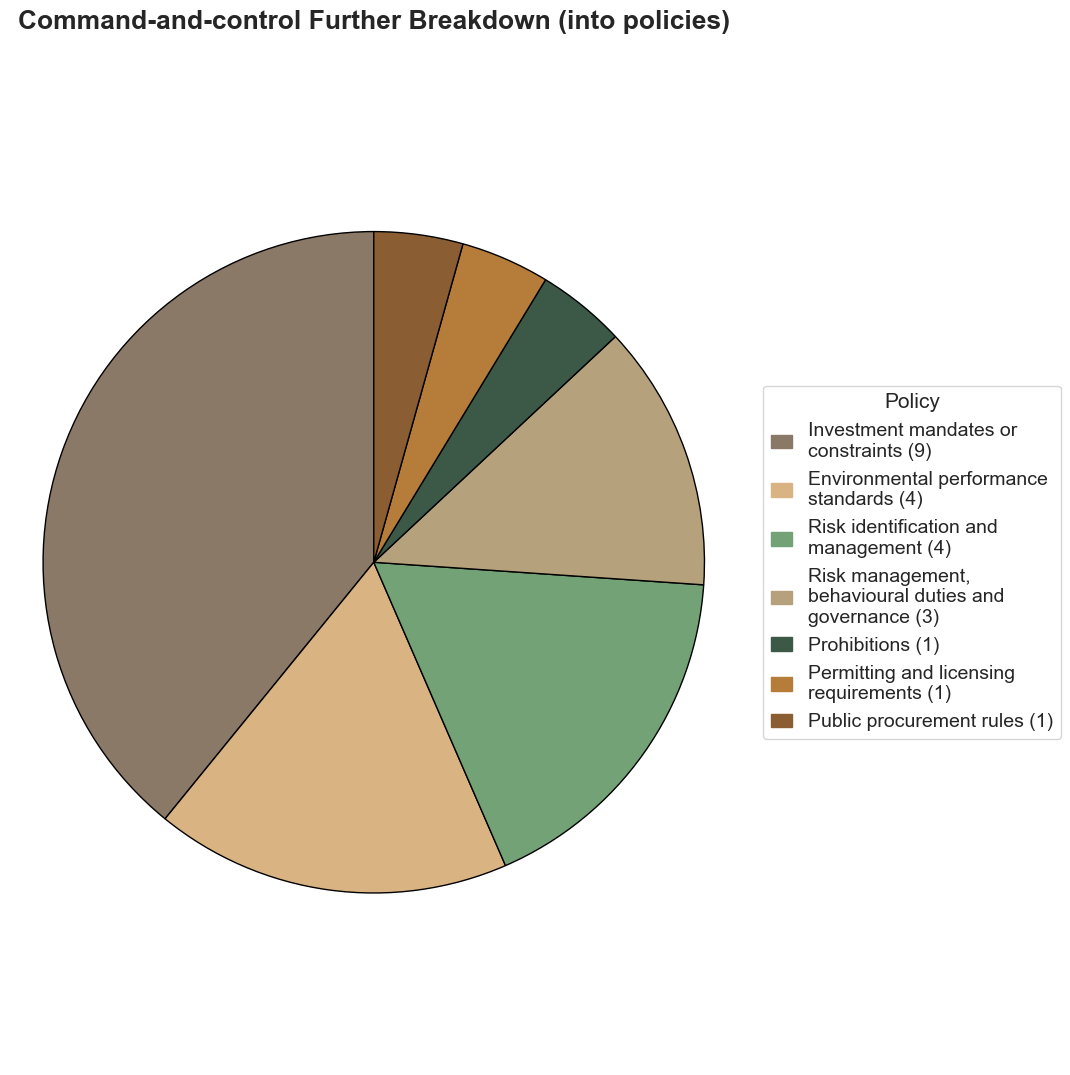

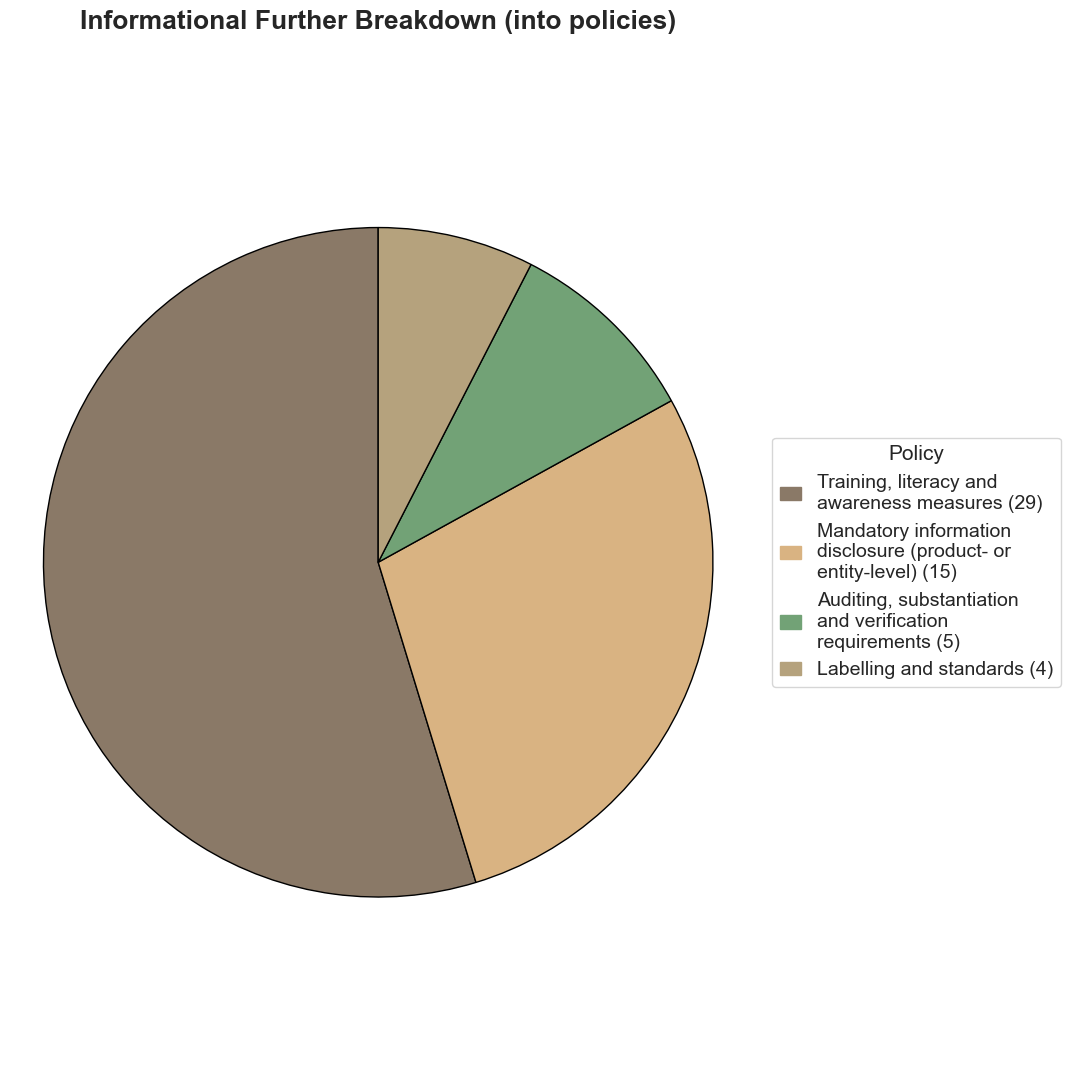

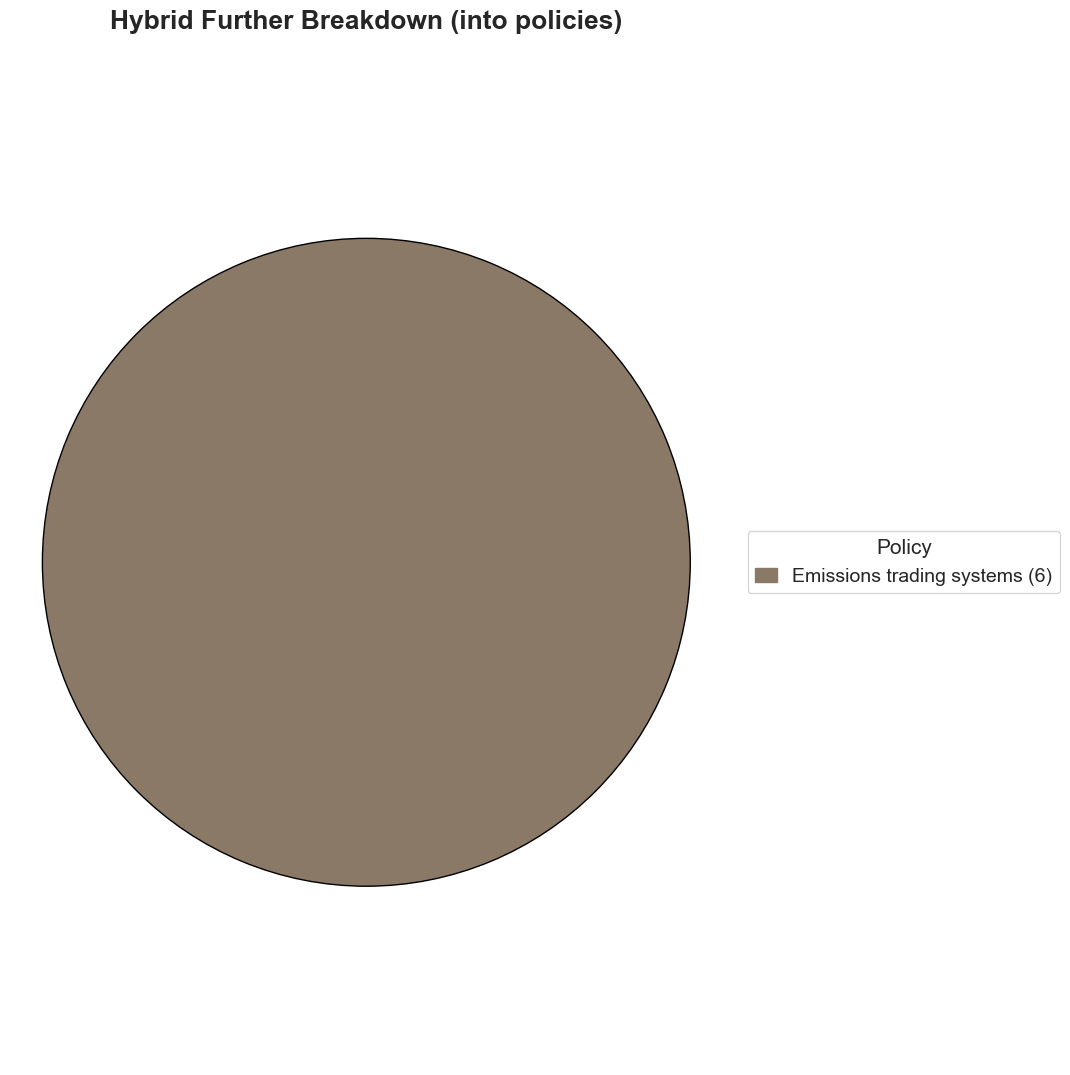

In [958]:
# --- 1. Pie chart of categories for question 5 ---

if 'category' in question_5_split.columns:
    # Use question_5_split category column directly (no mapping needed)
    cat_plot_series = question_5_split['category']
    cat_counts = cat_plot_series.value_counts()

    cats_for_palette = cat_counts.index.tolist()
    # color assignment for question 5 categories
    palette_dict = {
        'Market-based': COLOR_SCHEMA[0],
        'Command-and-control': COLOR_SCHEMA[1],
        'Informational': COLOR_SCHEMA[2],
        'Hybrid': COLOR_SCHEMA[3]
    }
    pie_colors = []
    for cat in cats_for_palette:
        if cat in palette_dict:
            pie_colors.append(palette_dict[cat])
        else:
            # Use next available color if category not in dict
            pie_colors.append(COLOR_SCHEMA[len(pie_colors) % len(COLOR_SCHEMA)])

    pie_category_labels = wrap_labels(cat_counts.index, width=20)
    legend_labels = [f'{label} ({count})' for label, count in zip(cat_counts.index, cat_counts.values)]

    fig, ax = plt.subplots(figsize=(9,9))
    wedges, texts = ax.pie(
        cat_counts.values,
        labels=None,  # Hide labels on pie
        autopct=None, # No percentages
        startangle=90,
        colors=pie_colors,
        textprops={'fontsize': 13, 'fontweight': 'bold'},
        wedgeprops=dict(edgecolor='k')
    )
    ax.set_title(
        "Distribution of Policy Instrument Categories",
        fontsize=22, fontweight='bold', pad=22
    )
    ax.axis('equal')
    patches = [mpatches.Patch(color=pie_colors[i], label=pie_category_labels[i] + f" ({cat_counts.values[i]})") 
               for i in range(len(cat_counts))]
    plt.legend(
        handles=patches,
        loc='center left',
        bbox_to_anchor=(1.00, 0.5),
        borderaxespad=0.,
        handlelength=1.0,
        title="Category",
        title_fontsize=16
    )
    plt.tight_layout()
    plt.show()

# --- 2. Pie charts of policies within each main category for Q5 ---

main_cats = ['Market-based', 'Command-and-control', 'Informational', 'Hybrid']

for main_cat in main_cats:
    # Filter by category
    policies_mask = question_5_split['category'] == main_cat

    # Use question_5_split and draw pie for 'policy' column within each category
    if 'policy' in question_5_split.columns and policies_mask.any():
        policy_counts = question_5_split.loc[policies_mask, 'policy'].value_counts()
        top_n = 12

        # Optionally group lesser counts as "Other"
        if len(policy_counts) > top_n:
            top_policies = policy_counts[:top_n]
            other_sum = policy_counts[top_n:].sum()
            policy_counts = pd.concat([top_policies, pd.Series({'Other': other_sum})])

        pie_policy_labels = wrap_labels(policy_counts.index, width=26)
        color_ct = len(policy_counts)
        if len(COLOR_SCHEMA) < color_ct:
            from itertools import cycle, islice
            pie_policy_colors = list(islice(cycle(COLOR_SCHEMA), color_ct))
        else:
            pie_policy_colors = COLOR_SCHEMA[:color_ct]

        legend_labels = [f'{label} ({count})'
                         for label, count in zip(pie_policy_labels, policy_counts.values)]

        fig, ax = plt.subplots(figsize=(11,11))
        wedges, texts = ax.pie(
            policy_counts.values,
            labels=None,  # Hide labels on pie to avoid clutter
            autopct=None, # No percentages
            startangle=90,
            colors=pie_policy_colors,
            textprops={'fontsize': 8, 'fontweight': 'bold'},
            wedgeprops=dict(edgecolor='k')
        )
        ax.set_title(
            f"{main_cat} Further Breakdown (into policies)", fontsize=19, fontweight='bold', pad=22
        )
        ax.axis('equal')
        patches = [mpatches.Patch(color=pie_policy_colors[i], label=legend_labels[i])
                   for i in range(min(len(pie_policy_colors), len(legend_labels)))]
        plt.legend(
            handles=patches,
            loc='center left',
            bbox_to_anchor=(1.035, 0.5),
            borderaxespad=0.,
            handlelength=1.1,
            title="Policy",
            title_fontsize=15
        )
        plt.tight_layout()
        plt.show()

____

## Other interesting visualizations 

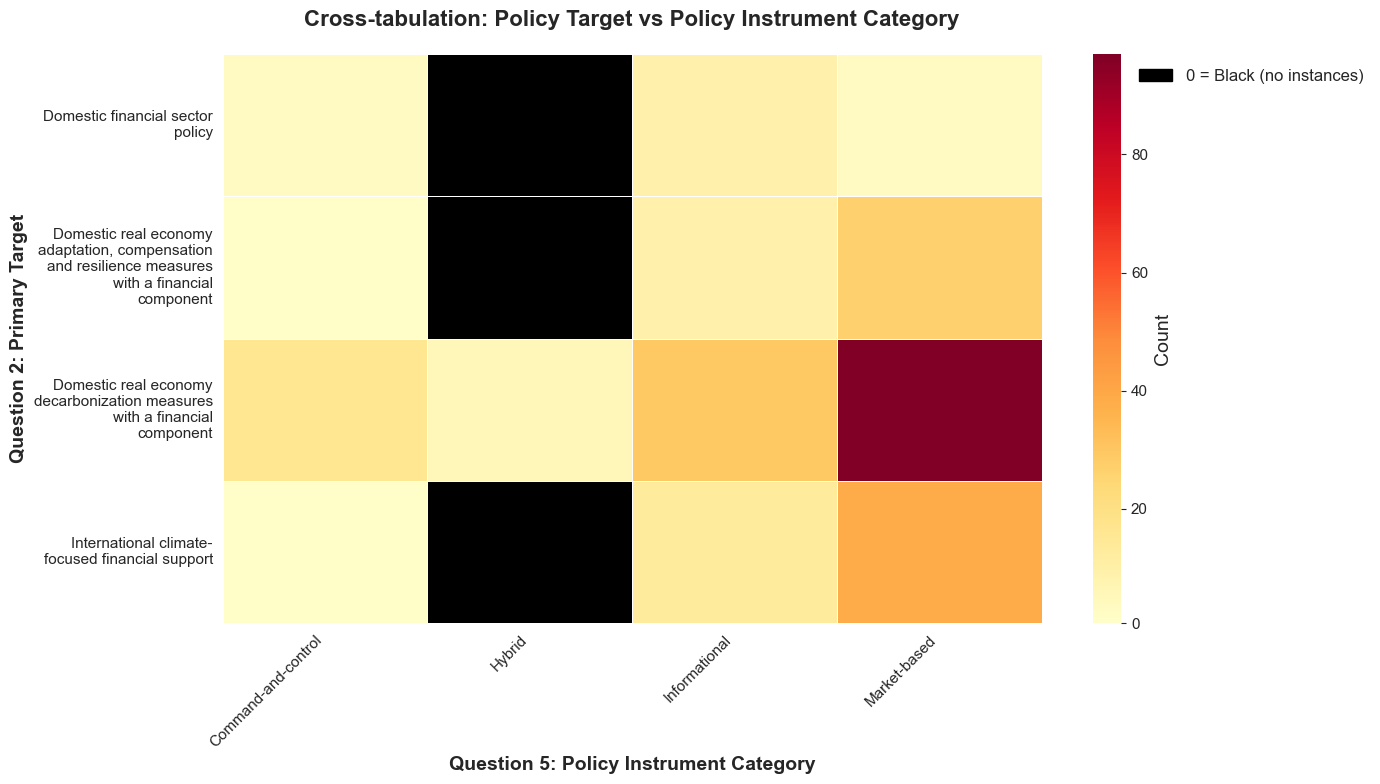


Q2 vs Q5 Cross-tabulation:
  Total combinations: 262
  Unique Q2 categories: 4
  Unique Q5 categories: 4


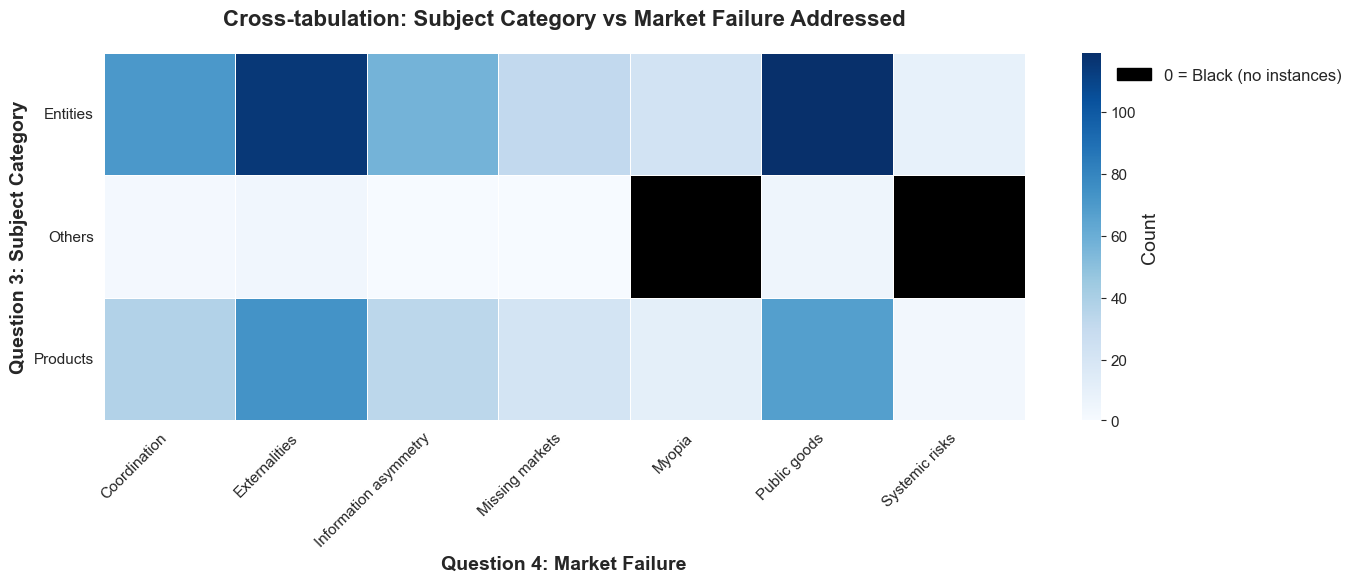

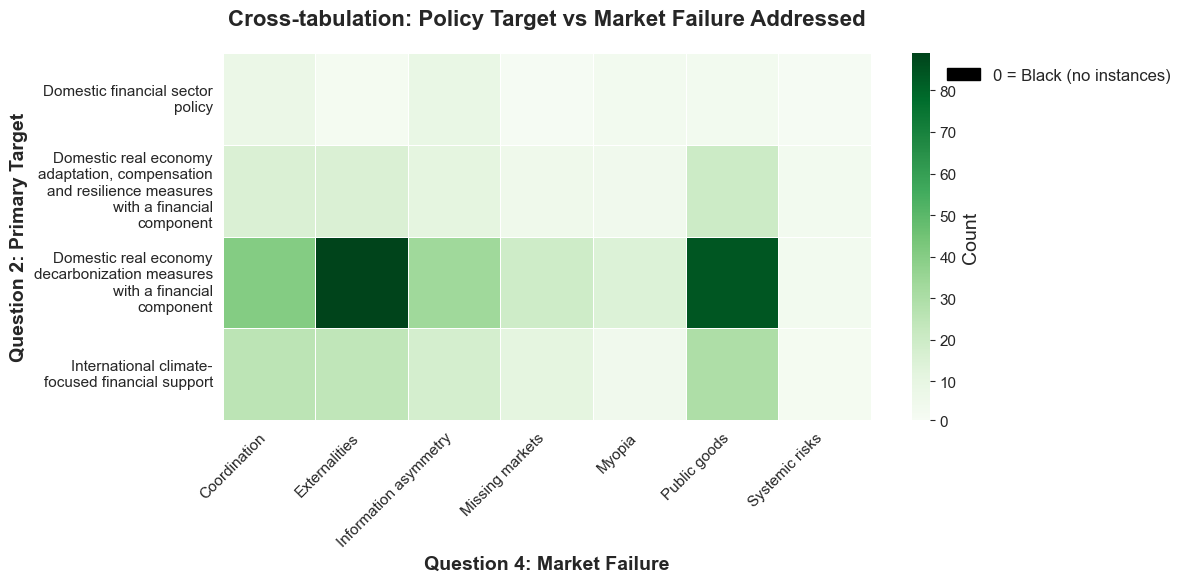

Cross-question relationship heatmaps complete!


In [978]:
## 1. Cross-Question Relationship Heatmaps

import textwrap
import matplotlib as mpl

# Set up plotting style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 12
})

def wrap_labels(ax, axis='x', width=25):
    """Wrap axis tick labels for better readability."""
    if axis == 'x':
        labels = [label.get_text() for label in ax.get_xticklabels()]
        wrapped_labels = [textwrap.fill(l, width) for l in labels]
        ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')
    elif axis == 'y':
        labels = [label.get_text() for label in ax.get_yticklabels()]
        wrapped_labels = [textwrap.fill(l, width) for l in labels]
        ax.set_yticklabels(wrapped_labels, rotation=0)

def heatmap_with_black_zero(data, ax, cmap="YlOrRd", **kwargs):
    """
    Custom heatmap that displays zeros as black.
    Returns the (QuadMesh, colorbar) tuple.
    Also adds a small black patch to the colorbar to denote '0 = Black' meaning.
    """
    norm = mpl.colors.Normalize(vmin=data.min().min(), vmax=data.max().max())
    colors = plt.get_cmap(cmap)(np.linspace(0,1,256))
    black = np.array([[0,0,0,1]])
    lst_colors = np.vstack([black, colors[1:]])
    listed = mpl.colors.ListedColormap(lst_colors)
    class ZeroBlackNormalize(mpl.colors.Normalize):
        def __init__(self, vmin=None, vmax=None):
            super().__init__(vmin, vmax)
        def __call__(self, value, clip=None):
            arr = np.ma.masked_invalid(value)
            # If vmax==1: only 0 and 1 possible
            if self.vmax <= 1:
                normed = np.where(arr<=0, 0, 1)
            else:
                normed = np.where(arr<=0, 0, 
                             (arr - 1) / (self.vmax - 1) * (len(lst_colors)-2) + 1 )
            return normed / (len(lst_colors)-1)
    # Plot heatmap
    mesh = sns.heatmap(
        data, 
        ax=ax, 
        cmap=listed, 
        norm=ZeroBlackNormalize(vmin=0, vmax=data.max().max()), 
        **kwargs
    )
    # Add a black patch on colorbar to explain "0 = Black"
    cbar = mesh.collections[0].colorbar
    if cbar is not None:
        from matplotlib.patches import Patch
        # Find current ticks and their colors
        # Add a black patch with label '0 = Black (no instances)'
        handles = []
        handles.append(Patch(facecolor='black', edgecolor='black', label='0 = Black (no instances)'))
        # Try to keep existing colorbar ticks, but not override main ones
        cbar.ax.figure.subplots_adjust(right=0.85)
        # Place the legend for black at the top of the colorbar
        cbar.ax.legend(handles=handles, bbox_to_anchor=(1.1, 1), loc='upper left', frameon=False)
    return mesh

# 1.1 Question 2 vs Question 5 (Policy Target vs Policy Instrument Category)
if 'question_2' in question_2_df.columns and 'category' in question_5_split.columns:
    def normalize_q2_category(cat):
        if not cat or not isinstance(cat, str):
            return None
        cat = cat.strip()
        if cat.startswith("International climate-focused financial"):
            return "International climate-focused financial support"
        if (cat.startswith("Domestic real economy adaptation and compensation measures") or
            cat.startswith("Domestic real economy adaptation, compensation and resilience measures")):
            return "Domestic real economy adaptation, compensation and resilience measures with a financial component"
        if cat.startswith("Domestic real economy decarbonization"):
            return "Domestic real economy decarbonization measures with a financial component"
        if cat.startswith("Domestic financial sector"):
            return "Domestic financial sector policy"
        return cat
    
    q2_per_doc = question_2_df.groupby('unique_id')['question_2'].apply(
        lambda x: [normalize_q2_category(c) for c in x.unique() if normalize_q2_category(c)]
    ).to_dict()
    q5_per_doc = question_5_split.groupby('unique_id')['category'].apply(
        lambda x: x.unique().tolist()
    ).to_dict()
    q2_q5_data = []
    all_q2_cats = set()
    all_q5_cats = set()
    for uid in set(q2_per_doc.keys()) & set(q5_per_doc.keys()):
        q2_cats = q2_per_doc[uid]
        q5_cats = q5_per_doc[uid]
        for q2_cat in q2_cats:
            for q5_cat in q5_cats:
                if q2_cat and q5_cat:
                    q2_q5_data.append({
                        'Q2_Category': q2_cat,
                        'Q5_Category': q5_cat
                    })
                    all_q2_cats.add(q2_cat)
                    all_q5_cats.add(q5_cat)
    if q2_q5_data:
        q2_q5_df = pd.DataFrame(q2_q5_data)
        crosstab = pd.crosstab(q2_q5_df['Q2_Category'], q2_q5_df['Q5_Category'])
        fig, ax = plt.subplots(figsize=(14, 8))
        crosstab_filled = crosstab.fillna(0)
        heatmap_with_black_zero(
            crosstab_filled, annot=False, ax=ax, linewidths=0.5, cbar_kws={'label': 'Count'}, 
            cmap='YlOrRd'
        )
        ax.set_xlabel('Question 5: Policy Instrument Category', fontsize=14, fontweight='bold')
        ax.set_ylabel('Question 2: Primary Target', fontsize=14, fontweight='bold')
        ax.set_title('Cross-tabulation: Policy Target vs Policy Instrument Category', 
                     fontsize=16, fontweight='bold', pad=20)
        wrap_labels(ax, 'x', width=25)
        wrap_labels(ax, 'y', width=25)
        plt.tight_layout()
        plt.show()
        print(f"\nQ2 vs Q5 Cross-tabulation:")
        print(f"  Total combinations: {len(q2_q5_data)}")
        print(f"  Unique Q2 categories: {len(all_q2_cats)}")
        print(f"  Unique Q5 categories: {len(all_q5_cats)}")

# 1.2 Question 3 Category vs Question 4 Market Failures
if 'category' in question_3_split.columns and 'question_4' in question_4_split.columns:
    q3_q4_merged = pd.merge(
        question_3_split[['unique_id', 'category']].drop_duplicates(),
        question_4_split[['unique_id', 'question_4']].drop_duplicates(),
        on='unique_id',
        how='inner'
    )
    if not q3_q4_merged.empty:
        crosstab = pd.crosstab(q3_q4_merged['category'], q3_q4_merged['question_4'])
        fig, ax = plt.subplots(figsize=(14, 6))
        crosstab_filled = crosstab.fillna(0)
        heatmap_with_black_zero(
            crosstab_filled, annot=False, ax=ax, linewidths=0.5, cbar_kws={'label': 'Count'},
            cmap='Blues'
        )
        ax.set_xlabel('Question 4: Market Failure', fontsize=14, fontweight='bold')
        ax.set_ylabel('Question 3: Subject Category', fontsize=14, fontweight='bold')
        ax.set_title('Cross-tabulation: Subject Category vs Market Failure Addressed',
                     fontsize=16, fontweight='bold', pad=20)
        wrap_labels(ax, 'x', width=25)
        wrap_labels(ax, 'y', width=25)
        plt.tight_layout()
        plt.show()

# 1.3 Question 2 Category vs Question 4 Market Failures
if 'question_2' in question_2_df.columns and 'question_4' in question_4_split.columns:
    def normalize_q2_category(cat):
        if not cat or not isinstance(cat, str):
            return None
        cat = cat.strip()
        if cat.startswith("International climate-focused financial"):
            return "International climate-focused financial support"
        if (cat.startswith("Domestic real economy adaptation and compensation measures") or
            cat.startswith("Domestic real economy adaptation, compensation and resilience measures")):
            return "Domestic real economy adaptation, compensation and resilience measures with a financial component"
        if cat.startswith("Domestic real economy decarbonization"):
            return "Domestic real economy decarbonization measures with a financial component"
        if cat.startswith("Domestic financial sector"):
            return "Domestic financial sector policy"
        return cat

    temp_q2_df = question_2_df.copy()
    temp_q2_df['normalized_q2'] = temp_q2_df['question_2'].apply(normalize_q2_category)
    q2_q4_merged = pd.merge(
        temp_q2_df[['unique_id', 'normalized_q2']].drop_duplicates(),
        question_4_split[['unique_id', 'question_4']].drop_duplicates(),
        on='unique_id',
        how='inner'
    )
    if not q2_q4_merged.empty:
        crosstab = pd.crosstab(q2_q4_merged['normalized_q2'], q2_q4_merged['question_4'])
        fig, ax = plt.subplots(figsize=(12, 6))
        crosstab_filled = crosstab.fillna(0)
        heatmap_with_black_zero(
            crosstab_filled, annot=False, ax=ax, linewidths=0.5, cbar_kws={'label': 'Count'},
            cmap='Greens'
        )
        ax.set_xlabel('Question 4: Market Failure', fontsize=14, fontweight='bold')
        ax.set_ylabel('Question 2: Primary Target', fontsize=14, fontweight='bold')
        ax.set_title('Cross-tabulation: Policy Target vs Market Failure Addressed',
                     fontsize=16, fontweight='bold', pad=20)
        wrap_labels(ax, 'x', width=25)
        wrap_labels(ax, 'y', width=25)
        plt.tight_layout()
        plt.show()

print("Cross-question relationship heatmaps complete!")


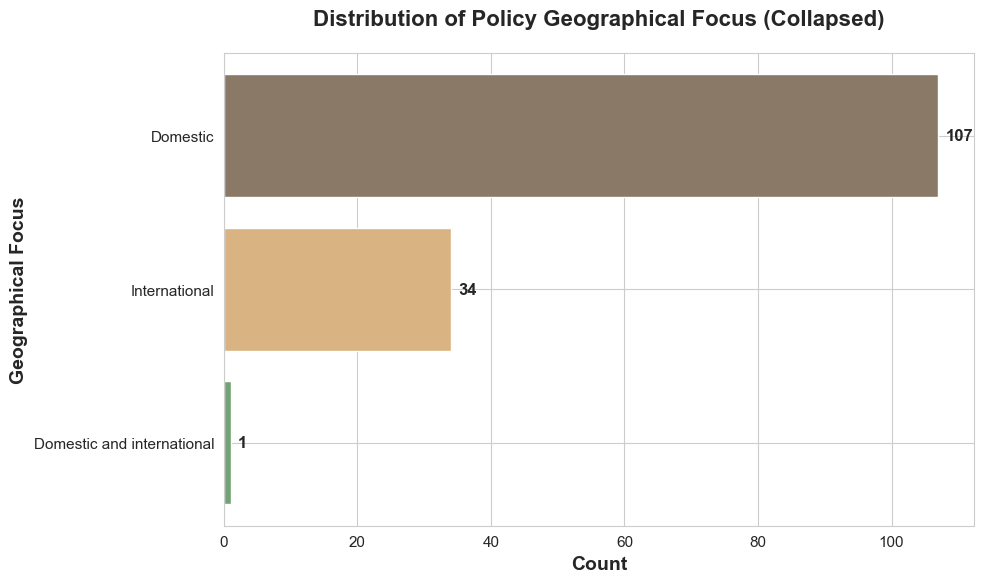

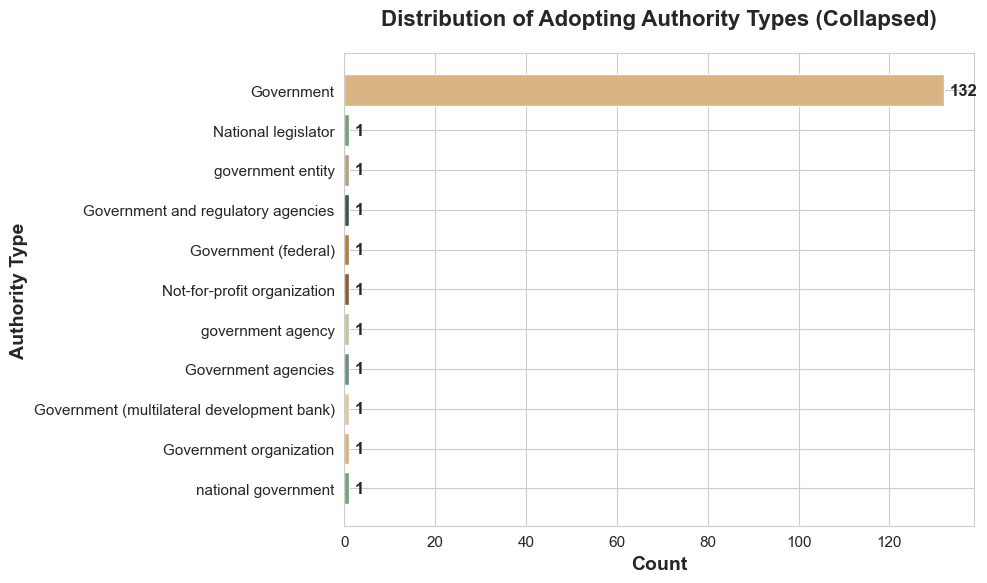

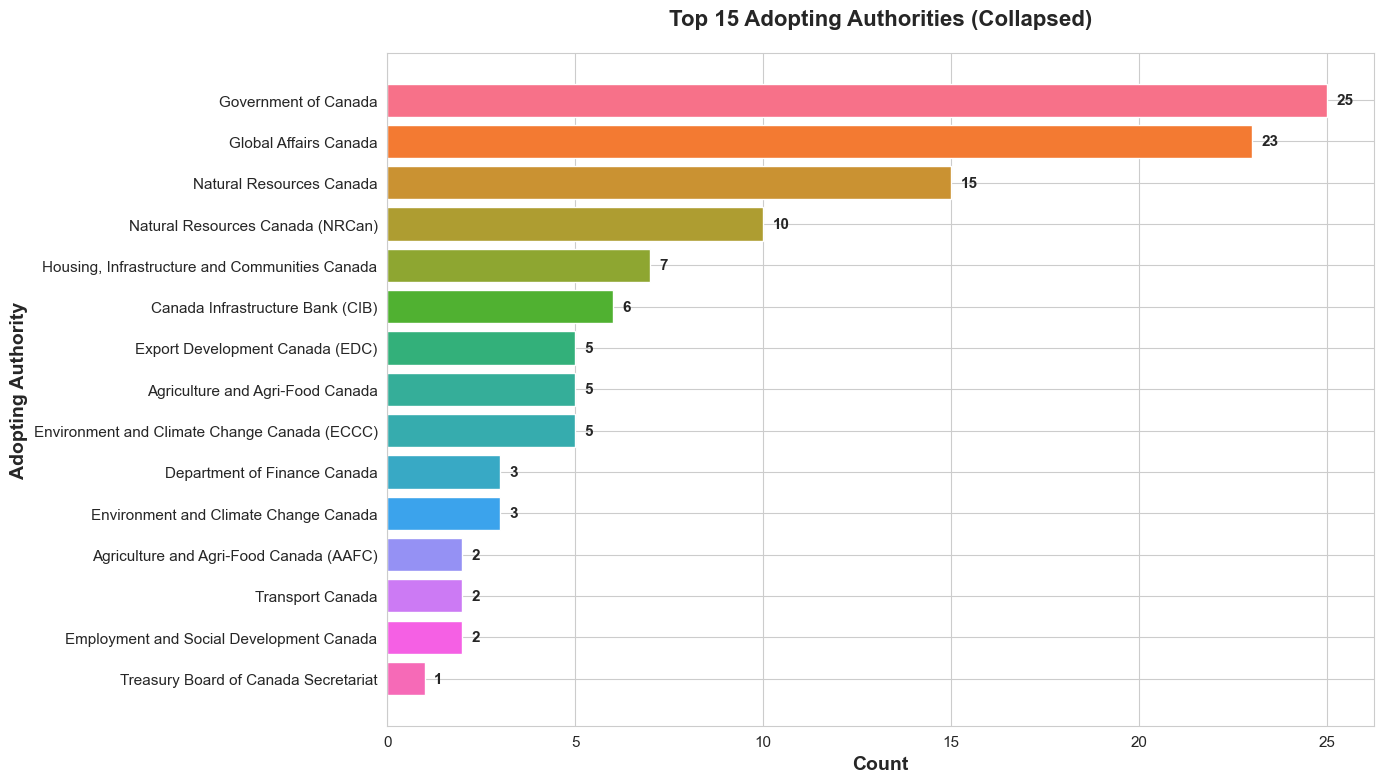

Question 6 metadata analysis complete!


In [973]:
## 2. Question 6 Temporal and Metadata Analysis

import difflib

# Parse Q6 data for temporal analysis
q6_temporal_data = []

for idx, row in combined_df.iterrows():
    q6 = str(row.get('question_6', '')).strip()
    unique_id = row.get('unique_id', '')
    
    if q6 and q6 != 'nan' and q6 != 'n/a':
        # Parse the formatted string (format: "Field: Value; Field: Value")
        fields = {}
        for part in q6.split(';'):
            if ':' in part:
                key, value = part.split(':', 1)
                key = key.strip()
                value = value.strip()
                fields[key] = value

        # Extract relevant fields
        q6_temporal_data.append({
            'unique_id': unique_id,
            'announcement_date': fields.get('Announcement Date', ''),
            'entry_into_force_date': fields.get('Entry Into Force Date', ''),
            'end_date': fields.get('End Date', ''),
            'adopting_authority_type': fields.get('Adopting Authority Type', ''),
            'adopting_authority_name': fields.get('Adopting Authority Name', ''),
            'policy_geographical_focus': fields.get('Policy Geographical Focus', '')
        })

def normalize_case_collapse(series):
    """Combine purely case-insensitive duplicates."""
    mapping = {}
    lower_seen = {}
    for item in series.dropna().unique():
        litem = item.lower().strip()
        if litem not in lower_seen:
            lower_seen[litem] = item
        mapping[item] = lower_seen[litem]
    return series.map(mapping).fillna(series)

def fuzzy_collapse(series, threshold=0.93):
    """Combine highly similar (fuzzy) string duplicates using difflib.get_close_matches"""
    items = list(series.dropna().unique())
    canonical = {}
    used = set()
    for item in items:
        if item in used:
            continue
        matches = difflib.get_close_matches(item, items, n=100, cutoff=threshold)
        # Always use the shortest version as canonical for ties, also pick case-most-common
        canon = sorted(matches, key=lambda x: (len(x), x.lower()))[0]
        for m in matches:
            canonical[m] = canon
            used.add(m)
    return series.map(canonical).fillna(series)

if q6_temporal_data:
    q6_df = pd.DataFrame(q6_temporal_data)

    # COLLAPSE similar values in relevant fields

    # (1) Geographical Focus collapse
    if 'policy_geographical_focus' in q6_df.columns:
        s = q6_df['policy_geographical_focus']
        s = normalize_case_collapse(s)
        s = fuzzy_collapse(s)
        q6_df['policy_geographical_focus_collapse'] = s
        geo_counts = s.value_counts()
        if len(geo_counts) > 0:
            fig, ax = plt.subplots(figsize=(10, 6))
            bars = ax.barh(geo_counts.index, geo_counts.values, color=COLOR_SCHEMA[:len(geo_counts)])
            ax.set_xlabel('Count', fontsize=14, fontweight='bold')
            ax.set_ylabel('Geographical Focus', fontsize=14, fontweight='bold')
            ax.set_title('Distribution of Policy Geographical Focus (Collapsed)', fontsize=16, fontweight='bold', pad=20)
            ax.invert_yaxis()
            for bar, count in zip(bars, geo_counts.values):
                ax.text(count + max(geo_counts.values)*0.01, bar.get_y() + bar.get_height()/2,
                       str(count), va='center', ha='left', fontsize=12, fontweight='bold')
            plt.tight_layout()
            plt.show()

    # (2) Adopting Authority Type collapse
    if 'adopting_authority_type' in q6_df.columns:
        s = q6_df['adopting_authority_type']
        s = normalize_case_collapse(s)
        s = fuzzy_collapse(s)
        q6_df['adopting_authority_type_collapse'] = s
        auth_type_counts = s.value_counts()
        if len(auth_type_counts) > 0:
            fig, ax = plt.subplots(figsize=(10, 6))
            bars = ax.barh(auth_type_counts.index, auth_type_counts.values, 
                          color=COLOR_SCHEMA[1:len(auth_type_counts)+1])
            ax.set_xlabel('Count', fontsize=14, fontweight='bold')
            ax.set_ylabel('Authority Type', fontsize=14, fontweight='bold')
            ax.set_title('Distribution of Adopting Authority Types (Collapsed)', fontsize=16, fontweight='bold', pad=20)
            ax.invert_yaxis()
            for bar, count in zip(bars, auth_type_counts.values):
                ax.text(count + max(auth_type_counts.values)*0.01, bar.get_y() + bar.get_height()/2,
                       str(count), va='center', ha='left', fontsize=12, fontweight='bold')
            plt.tight_layout()
            plt.show()

    # (3) Most common Adopting Authorities collapse
    if 'adopting_authority_name' in q6_df.columns:
        s = q6_df['adopting_authority_name']
        s = normalize_case_collapse(s)
        s = fuzzy_collapse(s)
        q6_df['adopting_authority_name_collapse'] = s
        auth_name_counts = s.value_counts().head(15)
        if len(auth_name_counts) > 0:
            fig, ax = plt.subplots(figsize=(14, 8))
            bars = ax.barh(auth_name_counts.index, auth_name_counts.values,
                          color=sns.color_palette("husl", len(auth_name_counts)))
            ax.set_xlabel('Count', fontsize=14, fontweight='bold')
            ax.set_ylabel('Adopting Authority', fontsize=14, fontweight='bold')
            ax.set_title('Top 15 Adopting Authorities (Collapsed)', fontsize=16, fontweight='bold', pad=20)
            ax.invert_yaxis()
            for bar, count in zip(bars, auth_name_counts.values):
                ax.text(count + max(auth_name_counts.values)*0.01, bar.get_y() + bar.get_height()/2,
                       str(count), va='center', ha='left', fontsize=11, fontweight='bold')
            plt.tight_layout()
            plt.show()

print("Question 6 metadata analysis complete!")


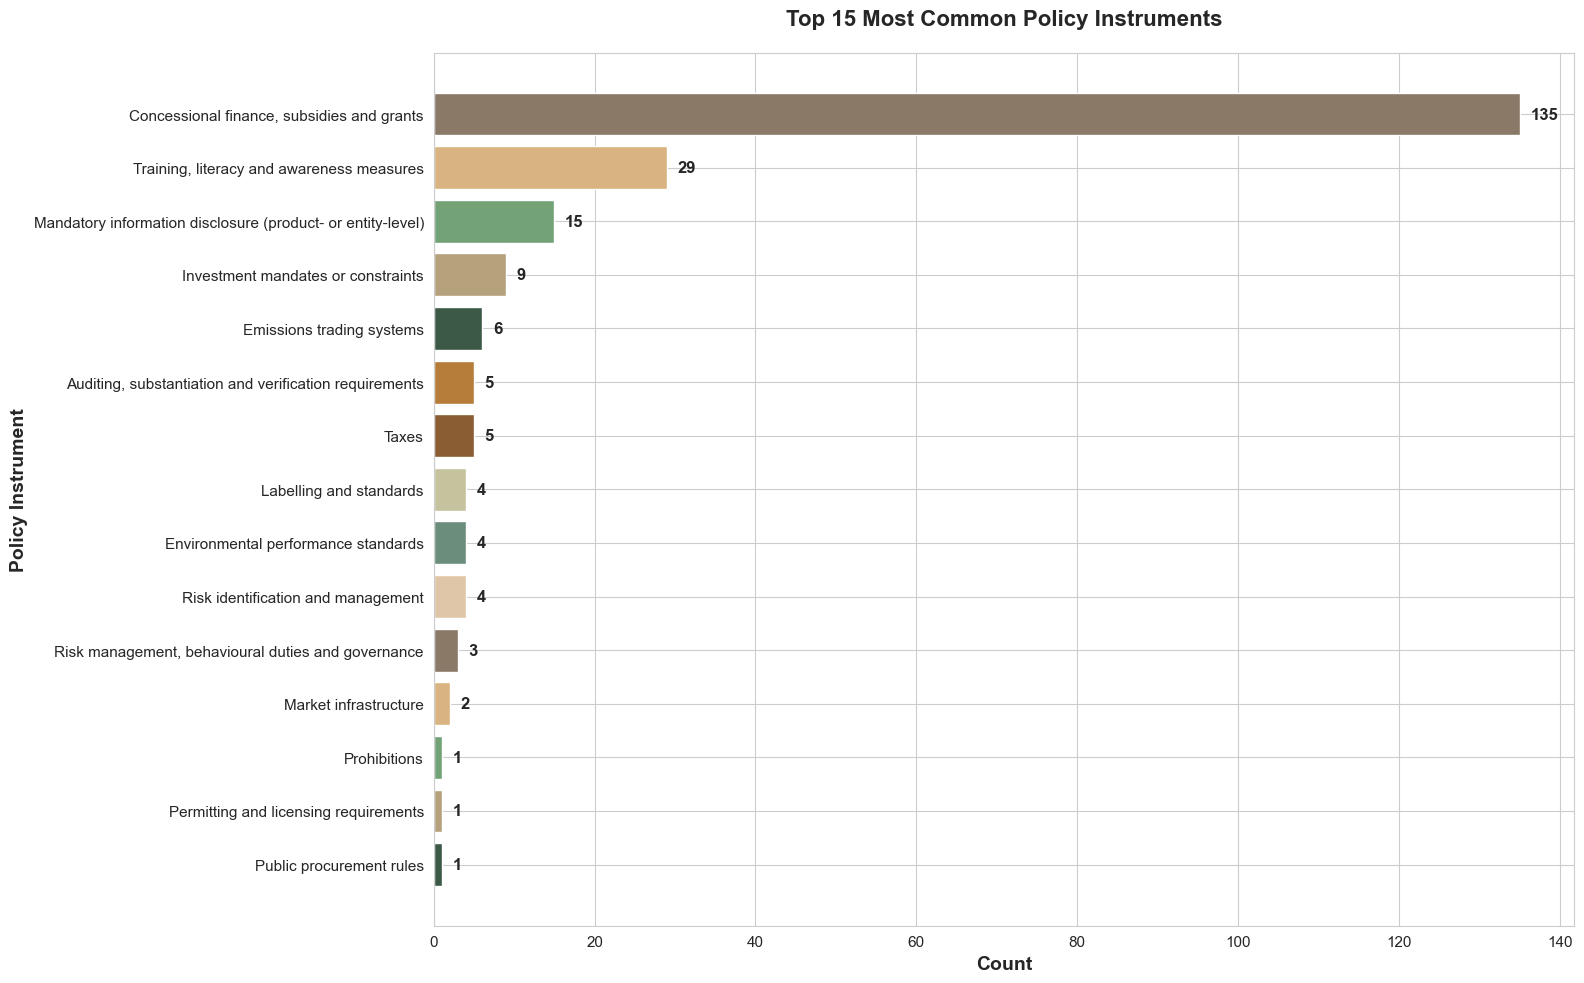

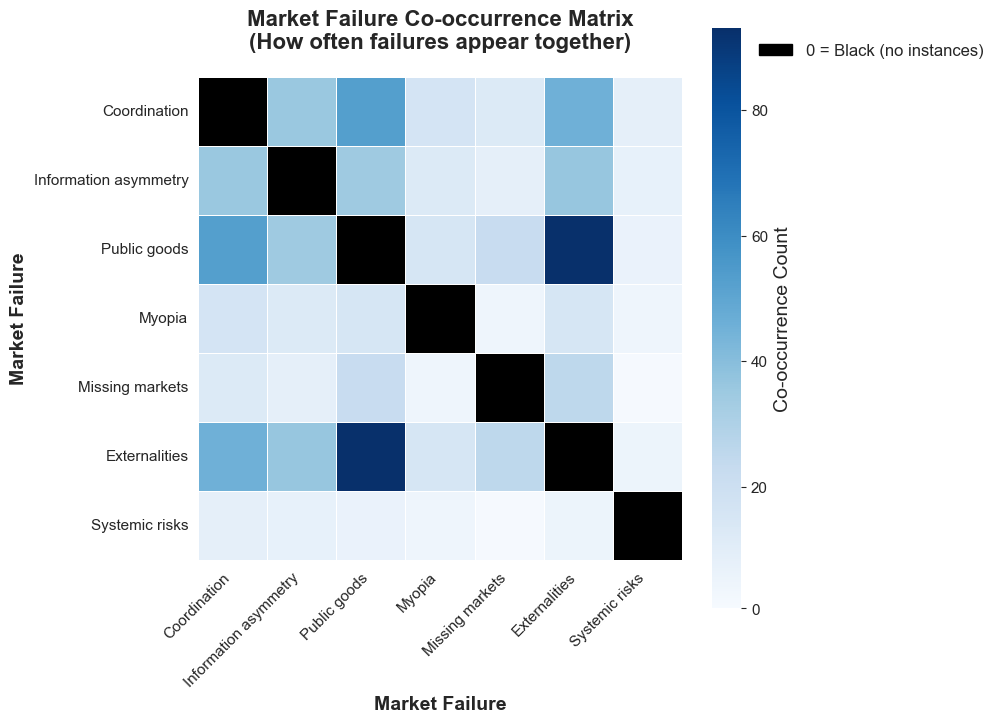

Policy instrument usage pattern analysis complete!


In [979]:
## 4. Policy Instrument Usage Patterns

# 4.1 Most Common Policy Instruments (Q5) by Category
if 'category' in question_5_split.columns and 'policy' in question_5_split.columns:
    # Get top policies overall
    top_policies = question_5_split['policy'].value_counts().head(15)
    
    fig, ax = plt.subplots(figsize=(16, 10))
    bars = ax.barh(range(len(top_policies)), top_policies.values,
                   color=COLOR_SCHEMA[:len(top_policies)])
    ax.set_yticks(range(len(top_policies)))
    ax.set_yticklabels([label[:60] + '...' if len(label) > 60 else label 
                        for label in top_policies.index], fontsize=11)
    ax.set_xlabel('Count', fontsize=14, fontweight='bold')
    ax.set_ylabel('Policy Instrument', fontsize=14, fontweight='bold')
    ax.set_title('Top 15 Most Common Policy Instruments',
                 fontsize=16, fontweight='bold', pad=20)
    ax.invert_yaxis()
    for i, (bar, count) in enumerate(zip(bars, top_policies.values)):
        ax.text(count + max(top_policies.values)*0.01, i, str(count),
               va='center', ha='left', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 4.2 Market Failure Co-occurrence Analysis (Q4) with "0 = Black" logic on heatmap
if 'question_4' in question_4_split.columns and 'unique_id' in question_4_split.columns:
    # Create co-occurrence matrix
    doc_failures = question_4_split.groupby('unique_id')['question_4'].apply(list).to_dict()
    
    # Get all unique failures
    all_failures = question_4_split['question_4'].unique()
    all_failures = [f for f in all_failures if pd.notnull(f)]
    
    # Build co-occurrence matrix
    cooccurrence = pd.DataFrame(0, index=all_failures, columns=all_failures)
    
    for uid, failures in doc_failures.items():
        failures = [f for f in failures if pd.notnull(f)]
        for i, f1 in enumerate(failures):
            for f2 in failures[i+1:]:
                cooccurrence.loc[f1, f2] += 1
                cooccurrence.loc[f2, f1] += 1
    
    if not cooccurrence.empty:
        fig, ax = plt.subplots(figsize=(10, 8))
        # Use custom black-zero logic for the heatmap
        # Reuse the `heatmap_with_black_zero` function defined earlier
        heatmap_with_black_zero(
            cooccurrence, annot=False, ax=ax, linewidths=0.5, cbar_kws={'label': 'Co-occurrence Count'},
            cmap='Blues', square=True
        )
        ax.set_xlabel('Market Failure', fontsize=14, fontweight='bold')
        ax.set_ylabel('Market Failure', fontsize=14, fontweight='bold')
        ax.set_title('Market Failure Co-occurrence Matrix\n(How often failures appear together)',
                     fontsize=16, fontweight='bold', pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

print("Policy instrument usage pattern analysis complete!")
